<a href="https://colab.research.google.com/github/junghwanlee94/dsds8/blob/main/34A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                             |          | [  0%]   00:00 -> (? left)

Report card_fraud_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



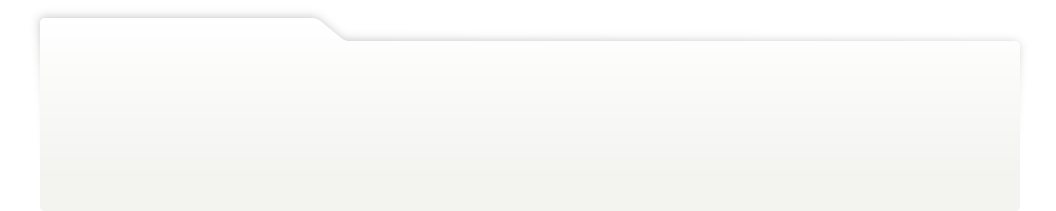
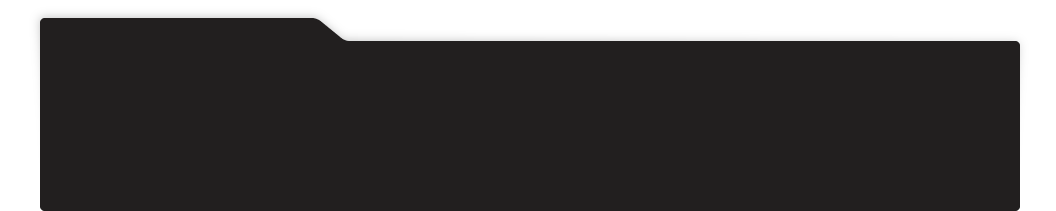
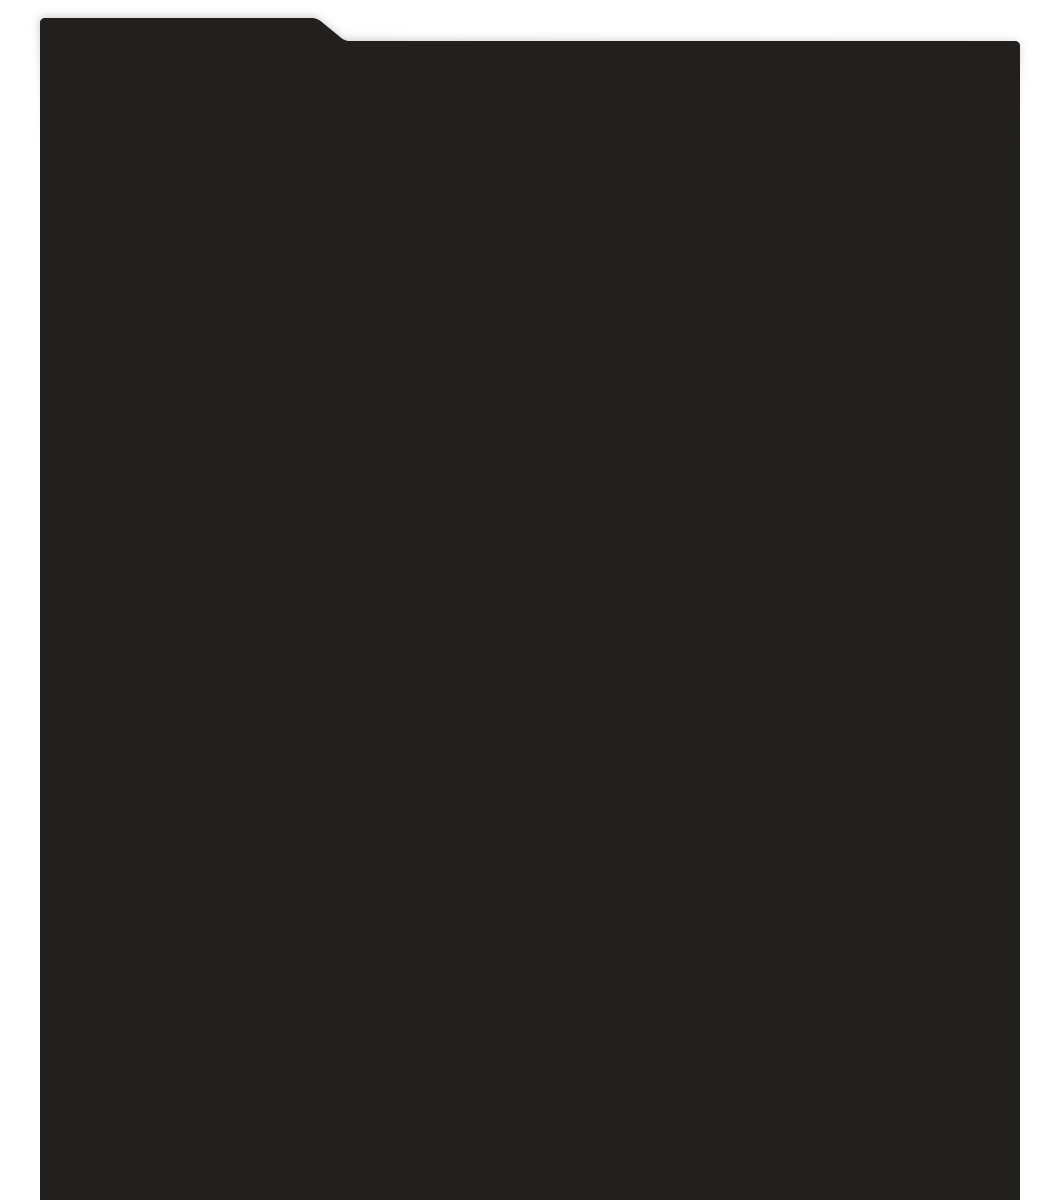
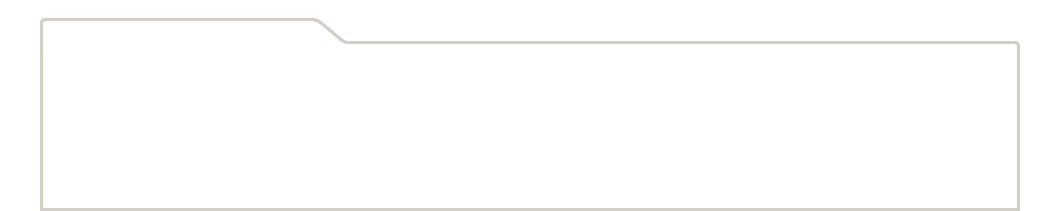
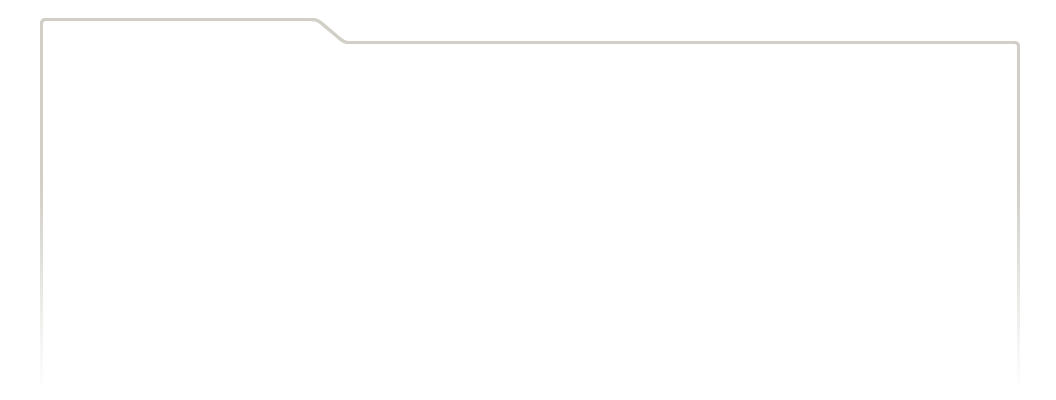
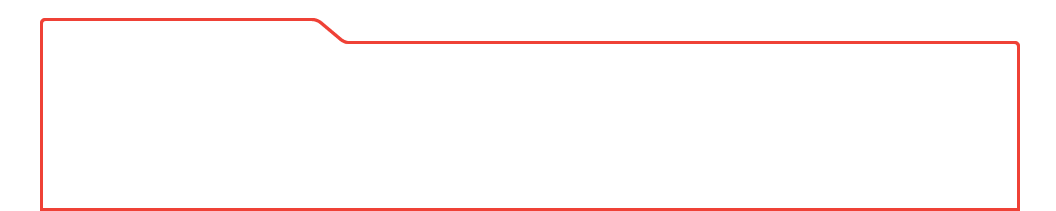
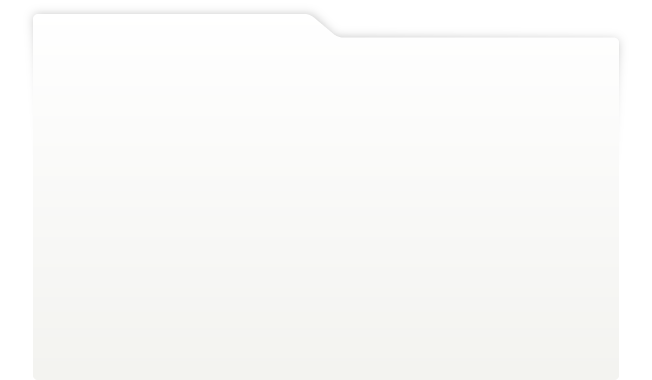
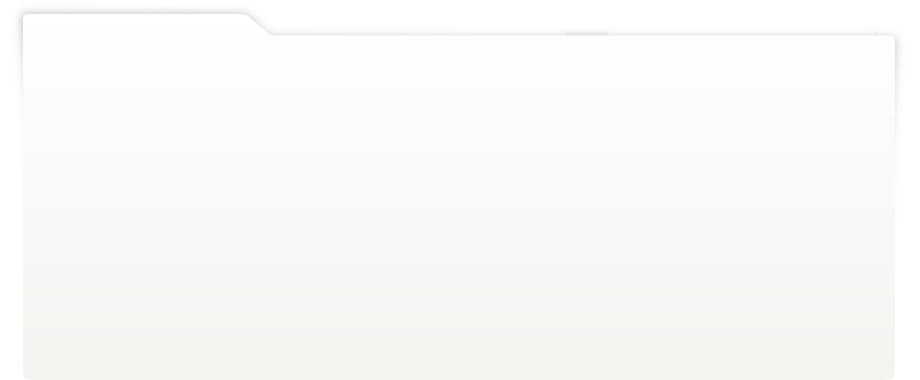
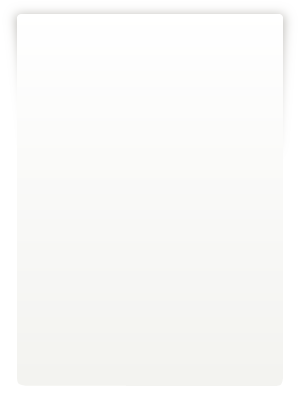
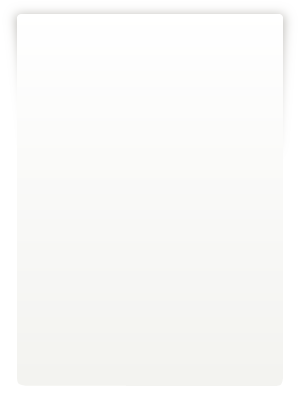
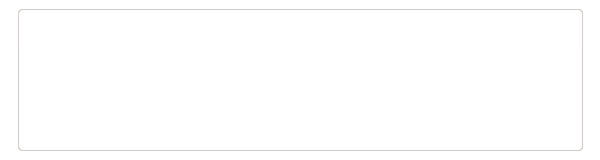
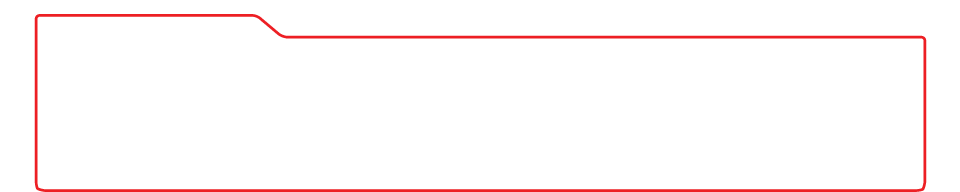
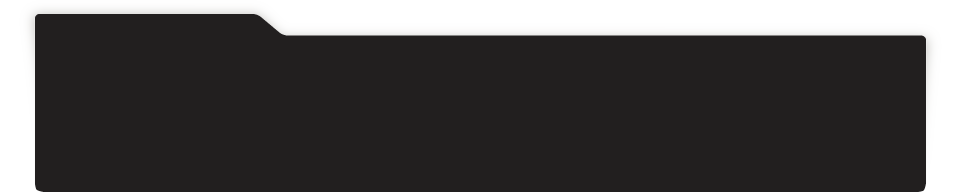
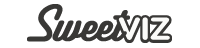
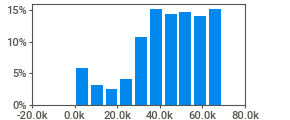
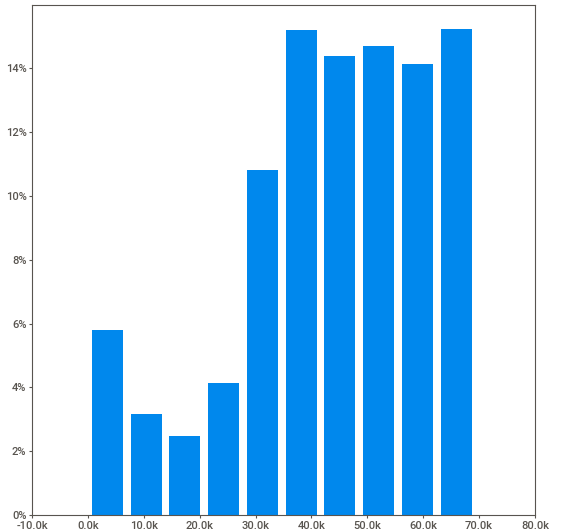
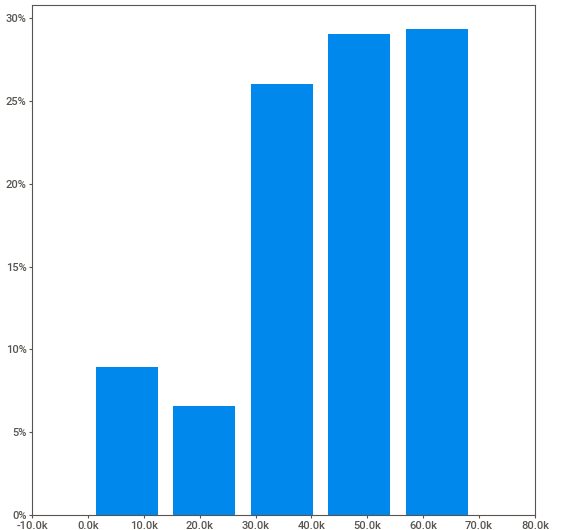
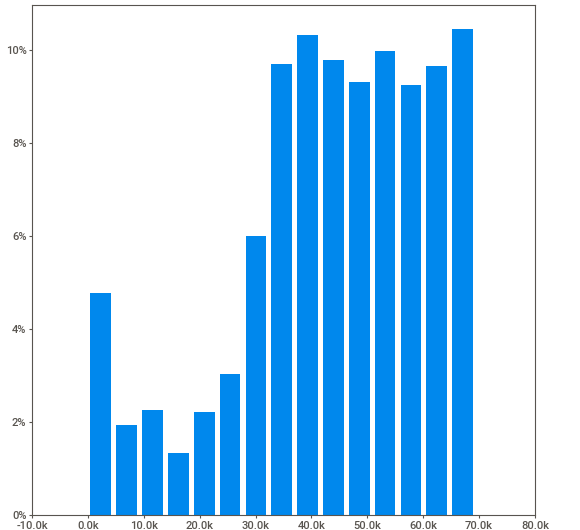
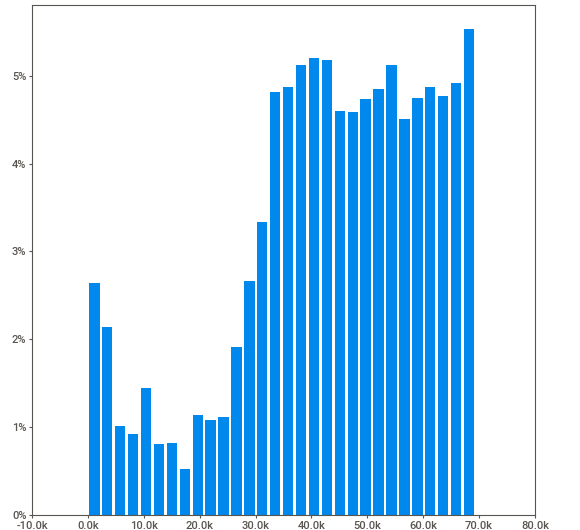
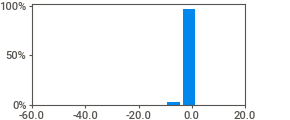
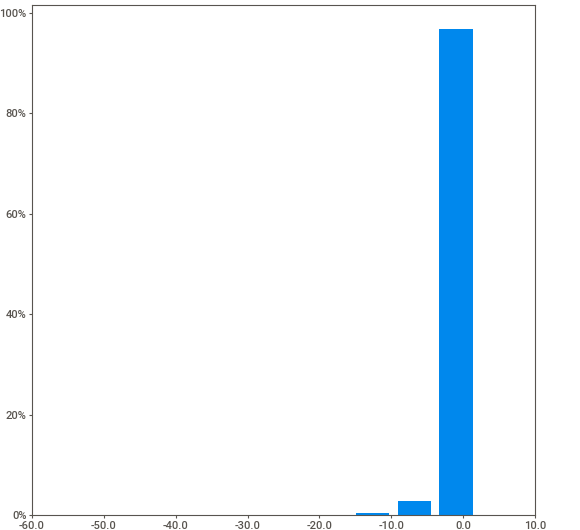
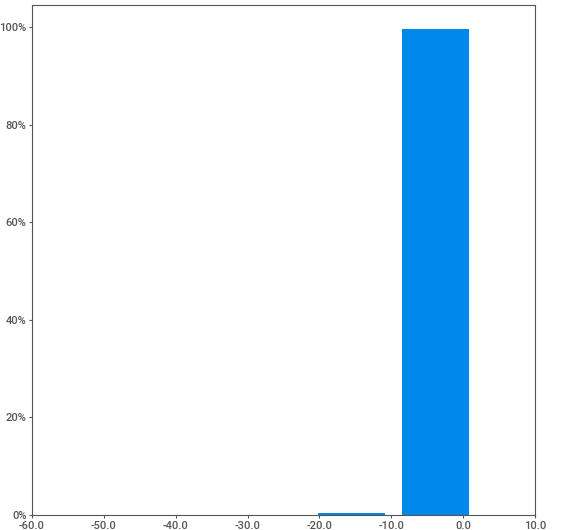
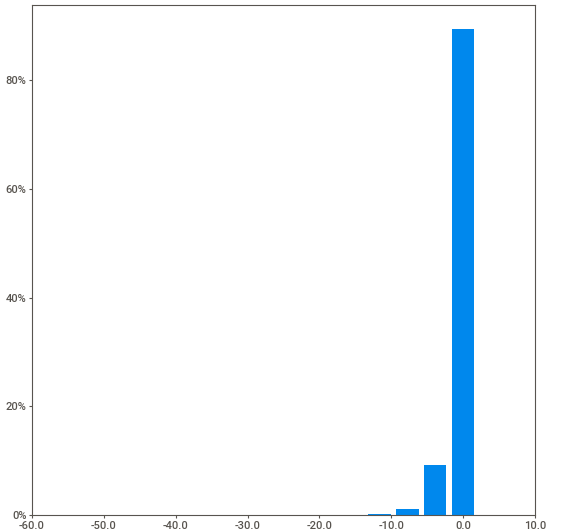
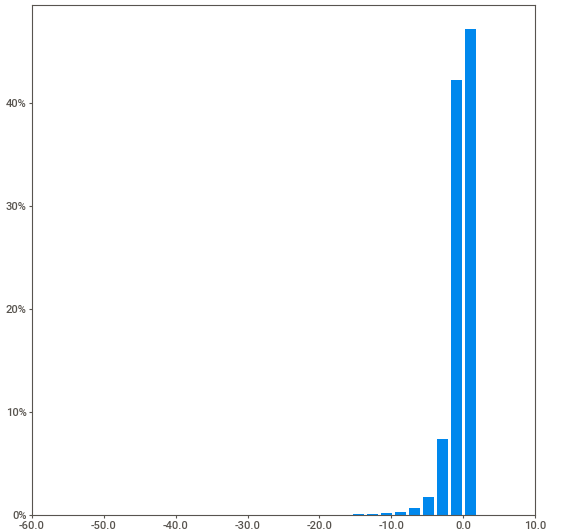
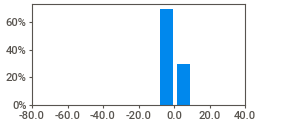
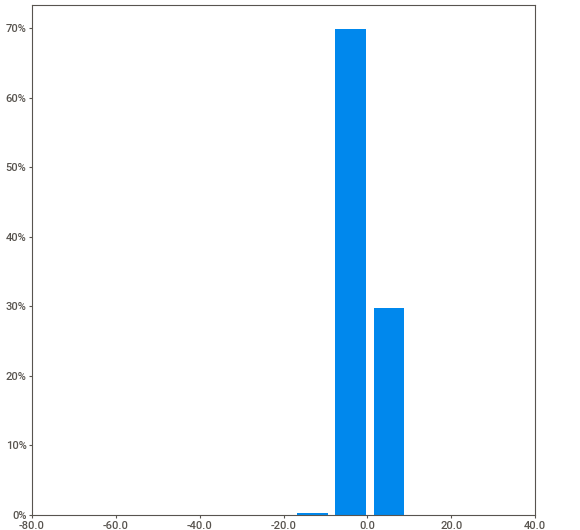
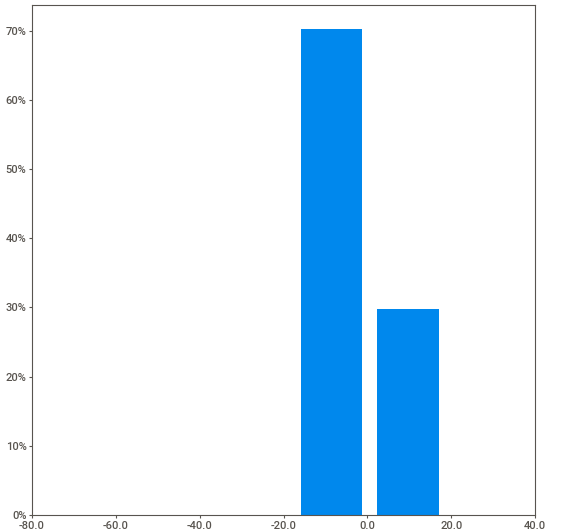
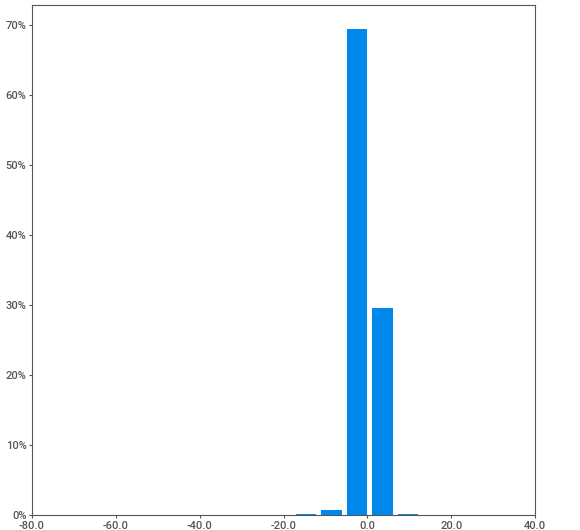
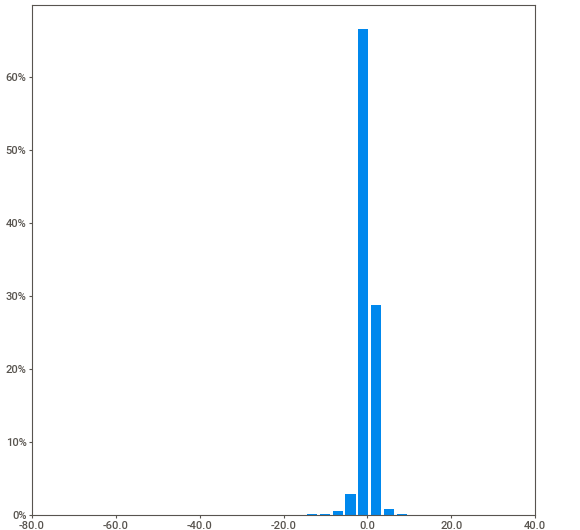
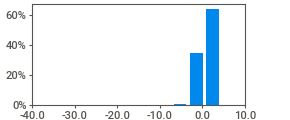
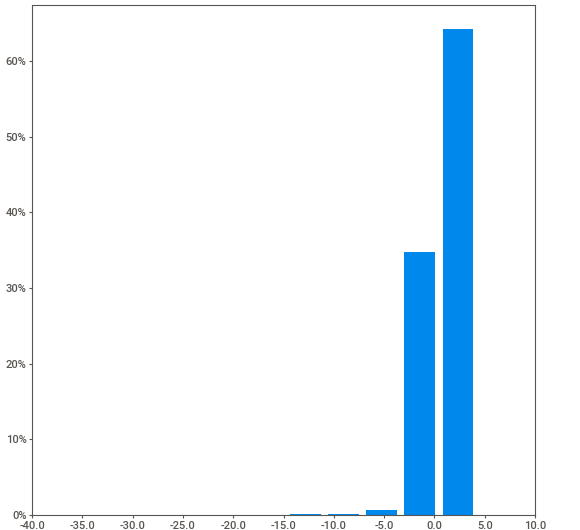
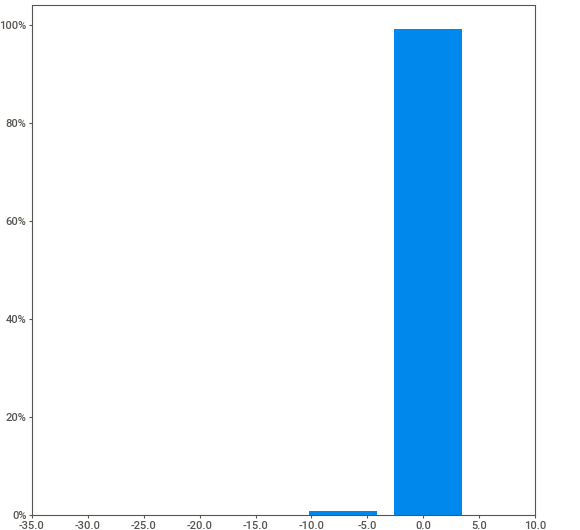
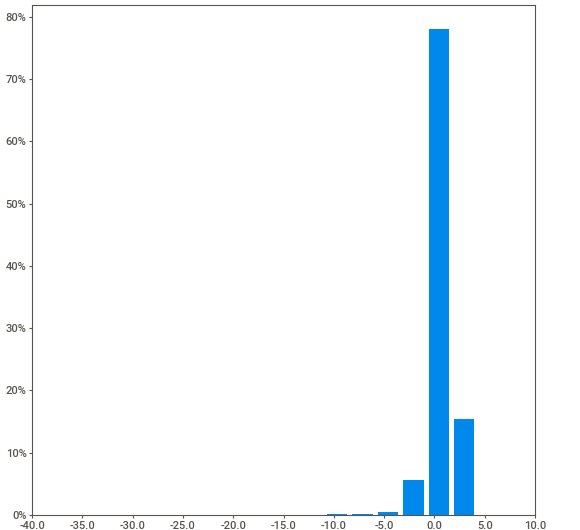
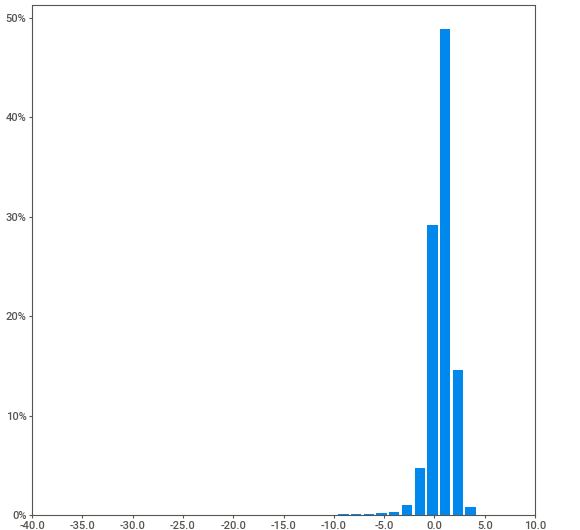
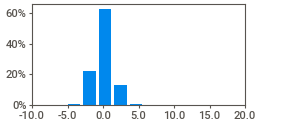
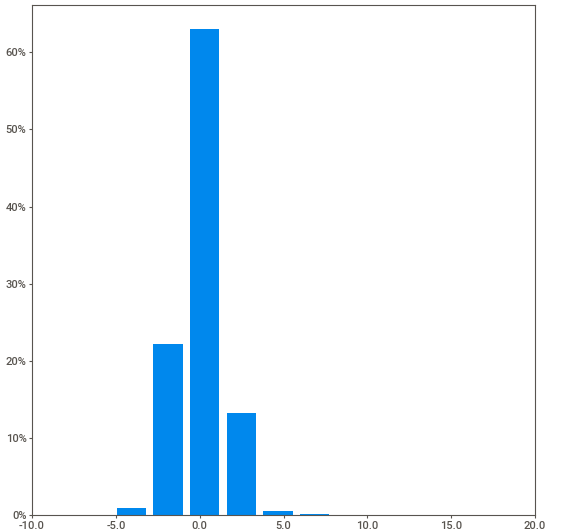
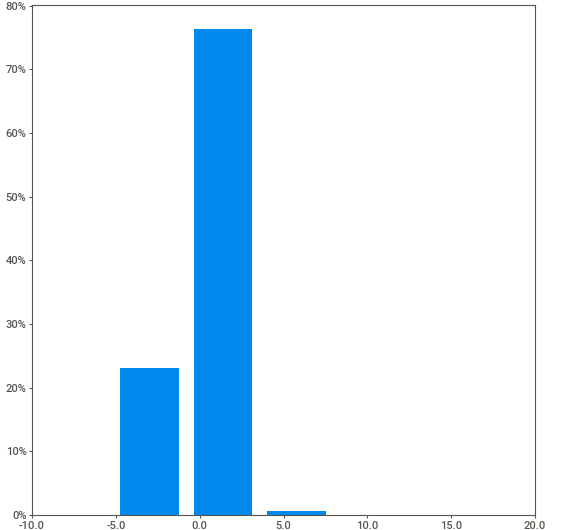
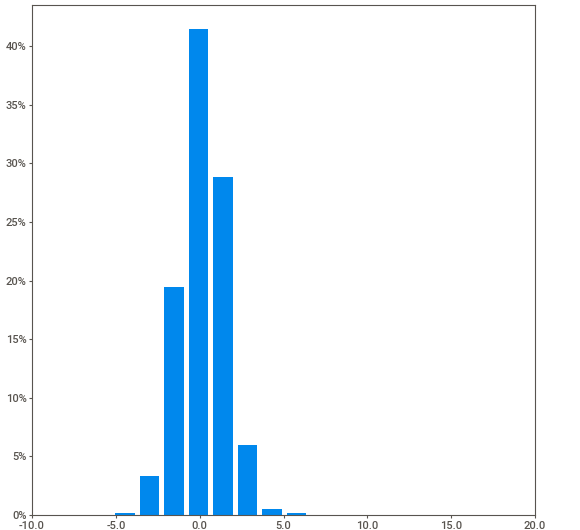
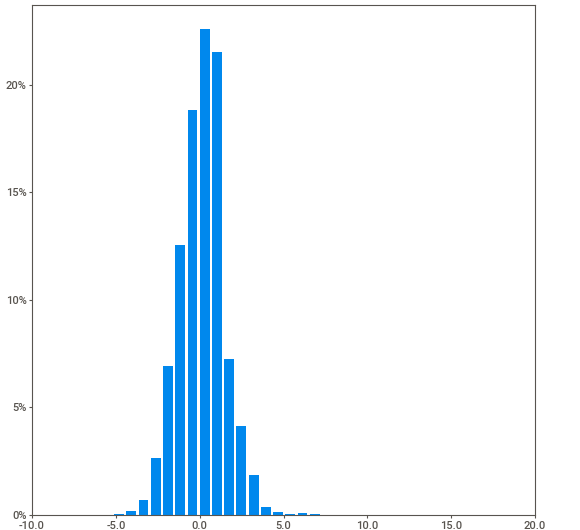
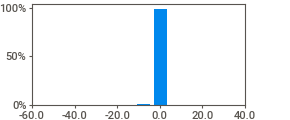
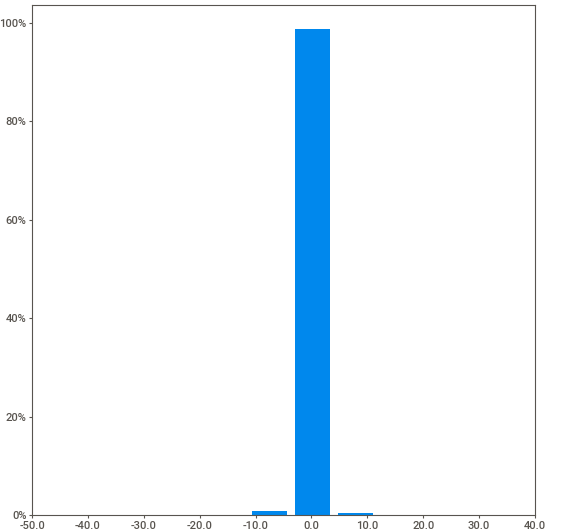
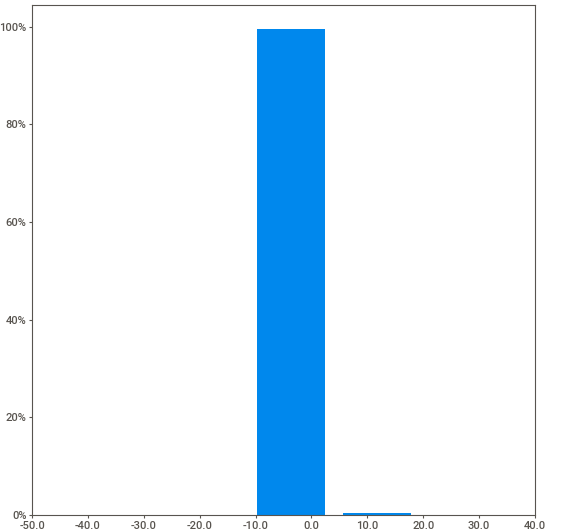
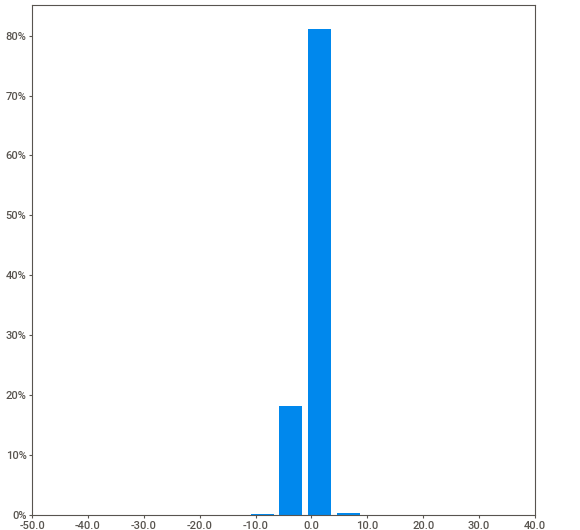
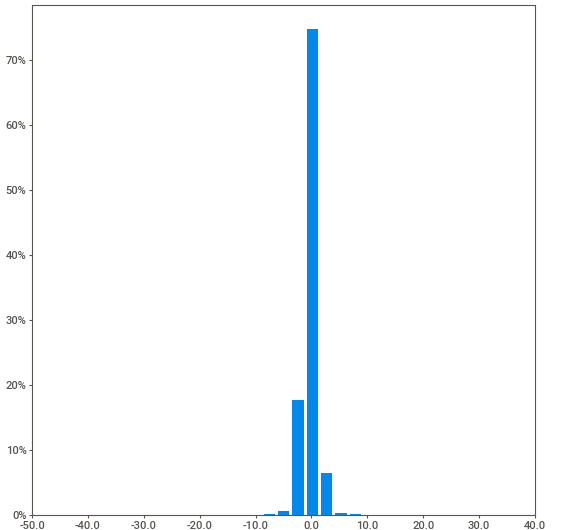
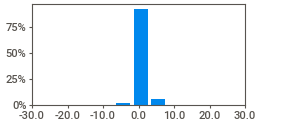
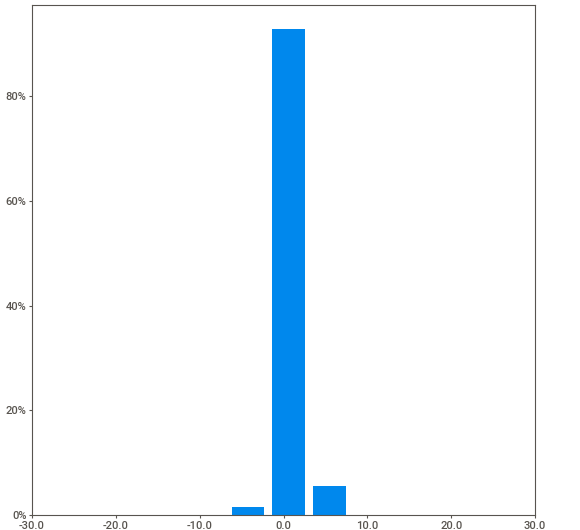
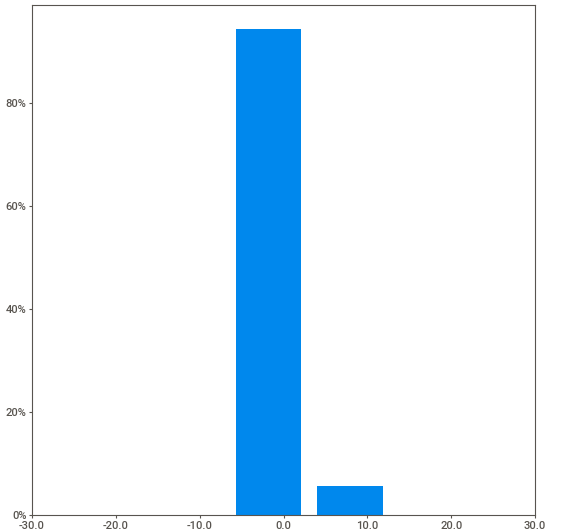
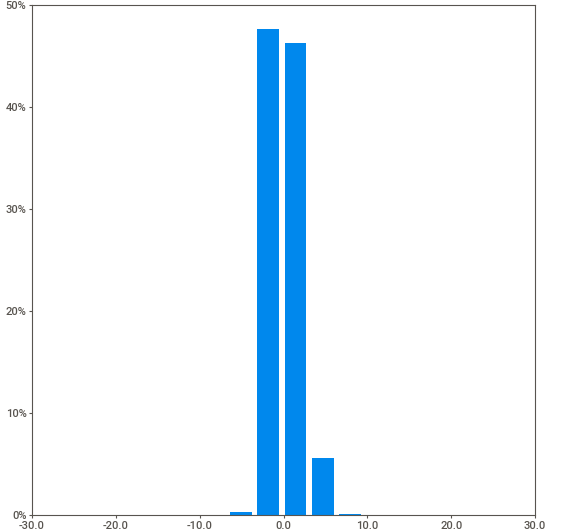
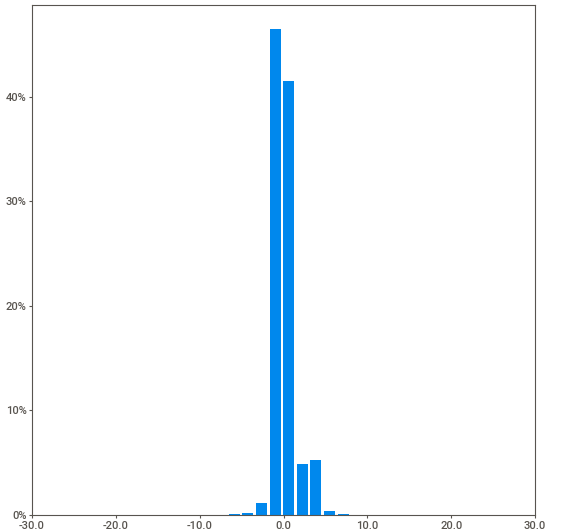
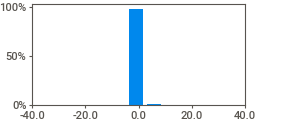
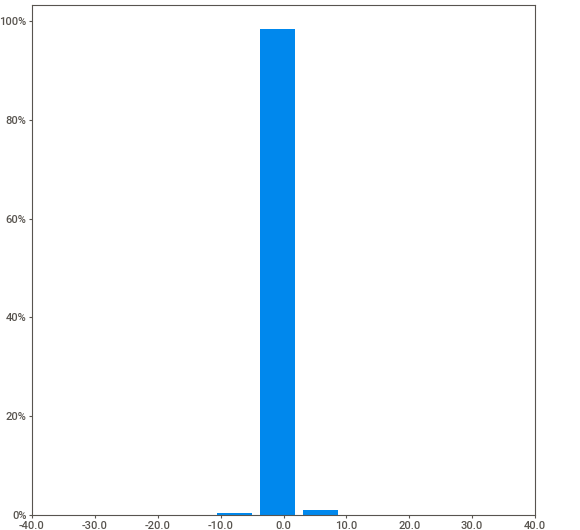
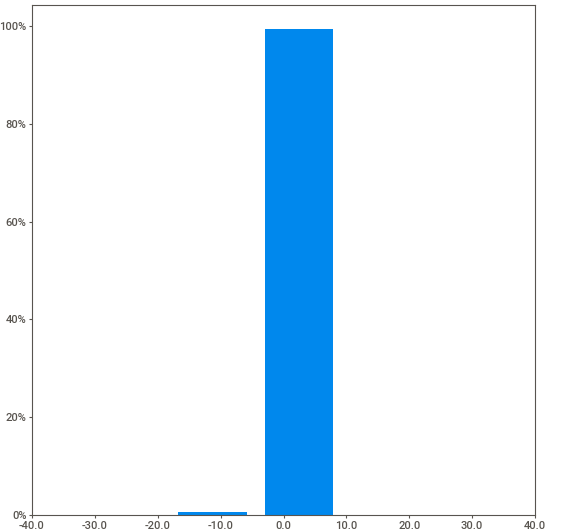
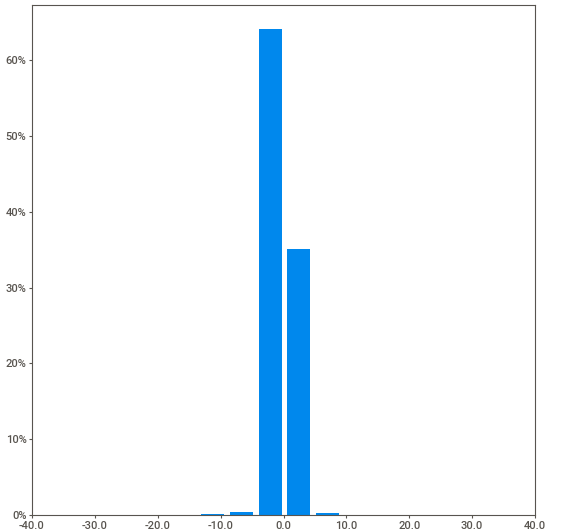
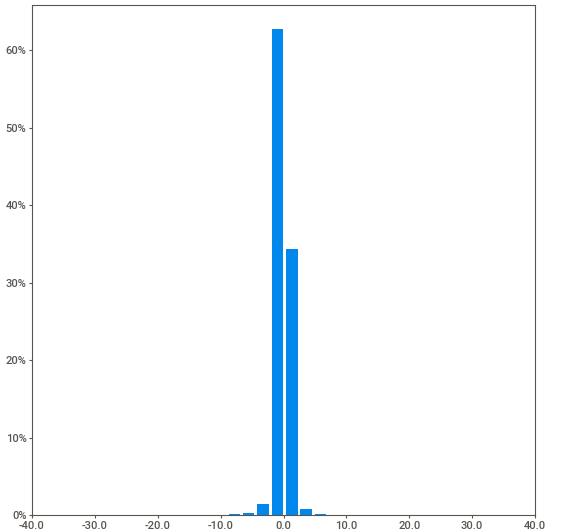
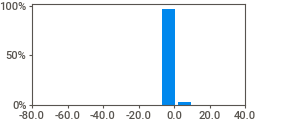
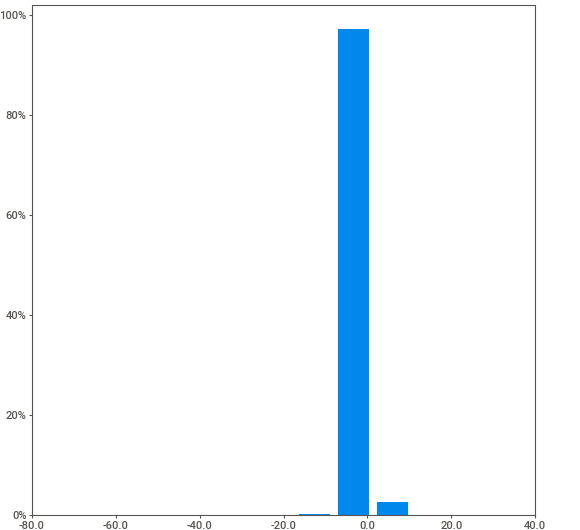
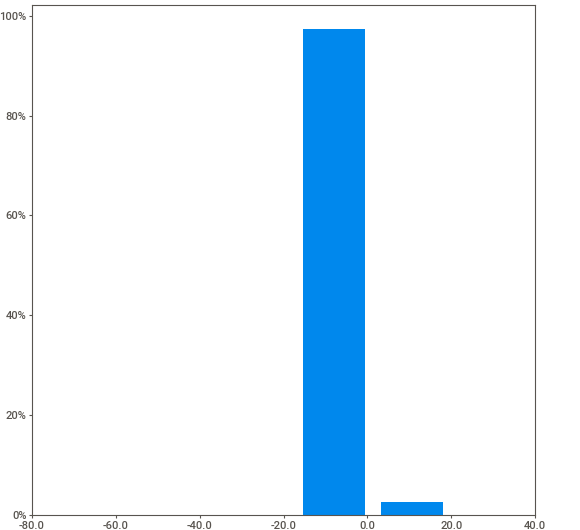
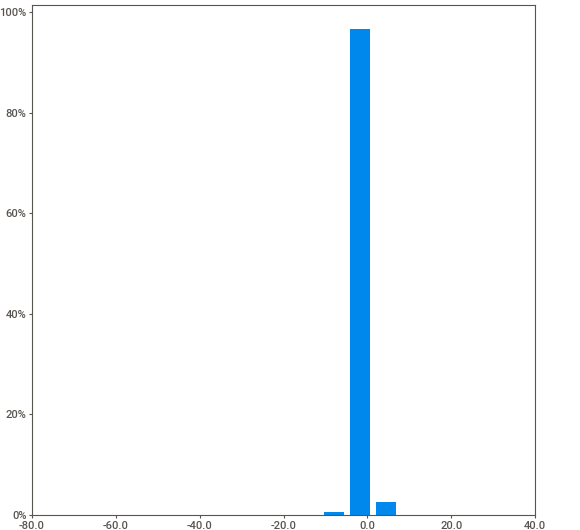
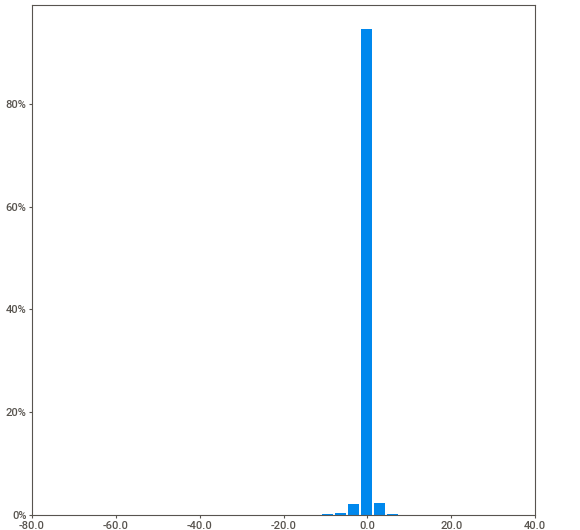
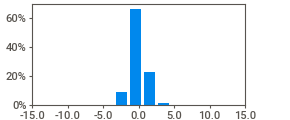
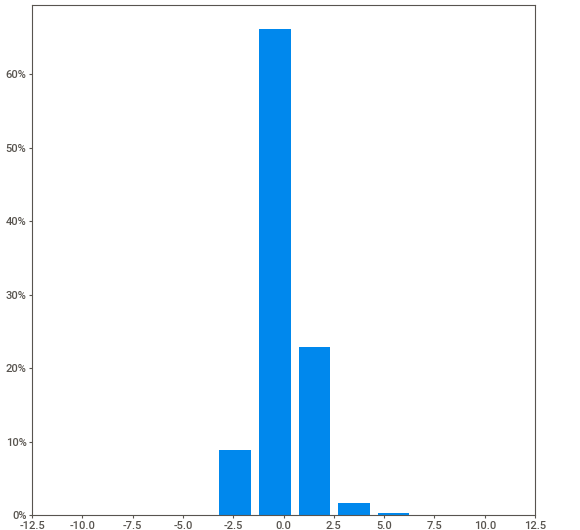
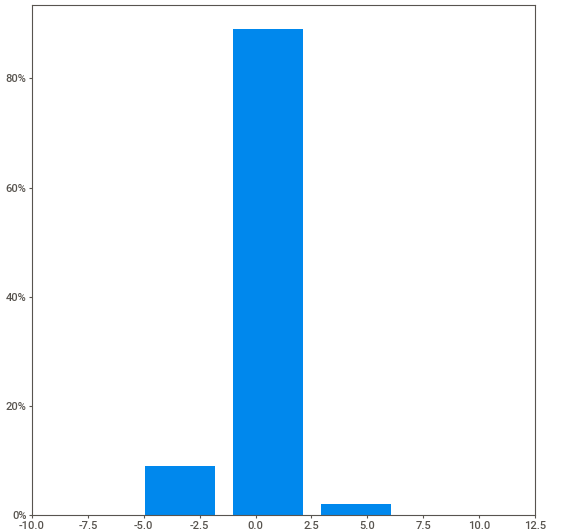
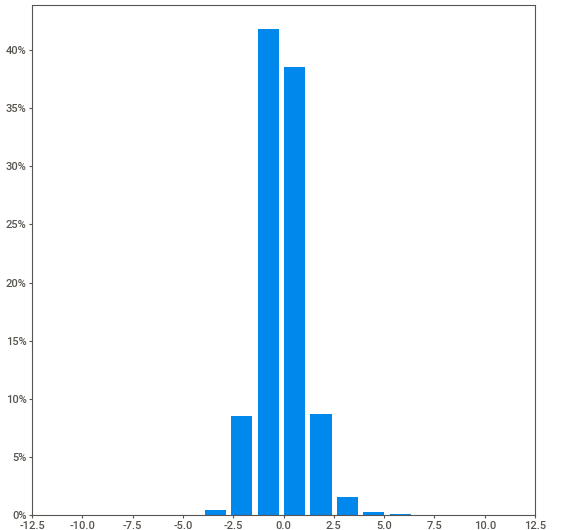
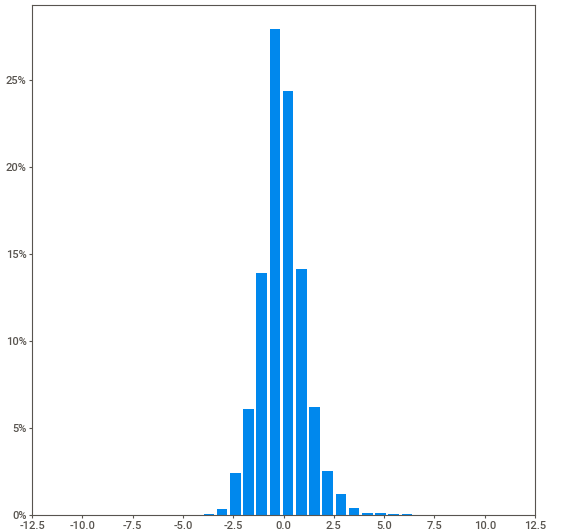
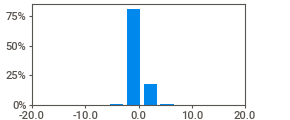
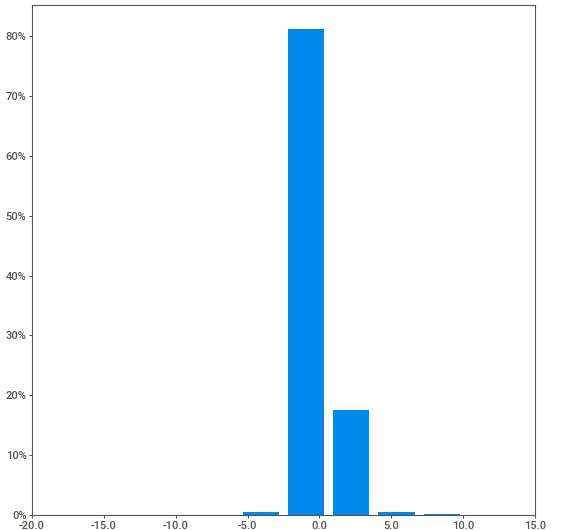
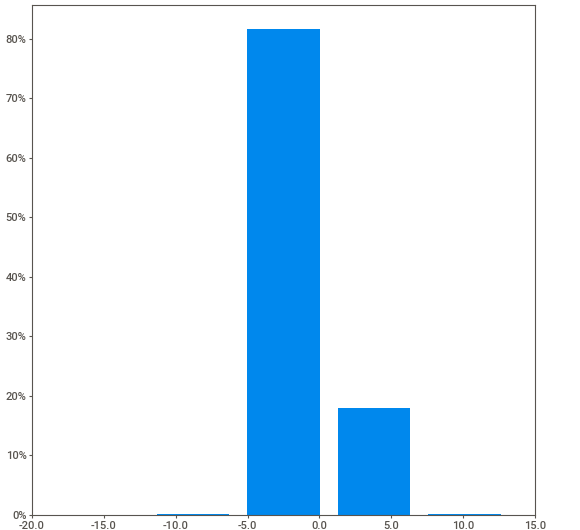
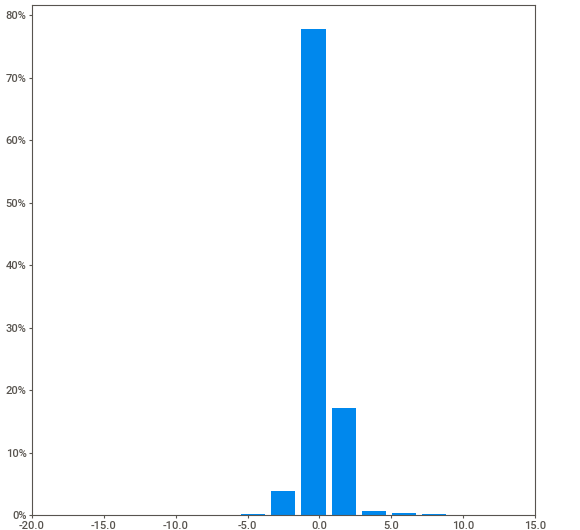
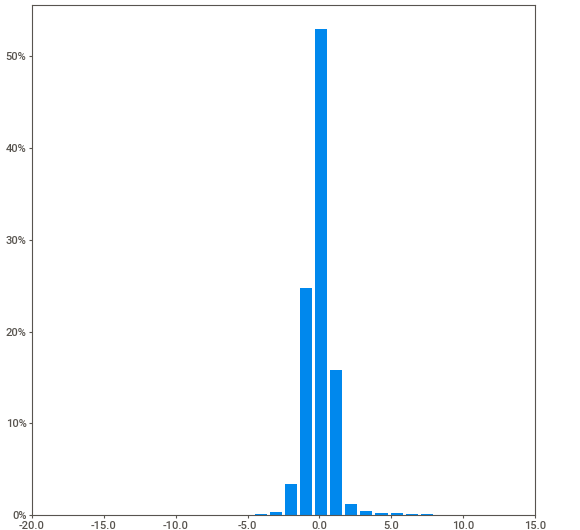
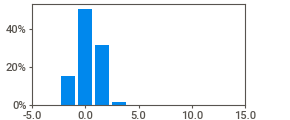
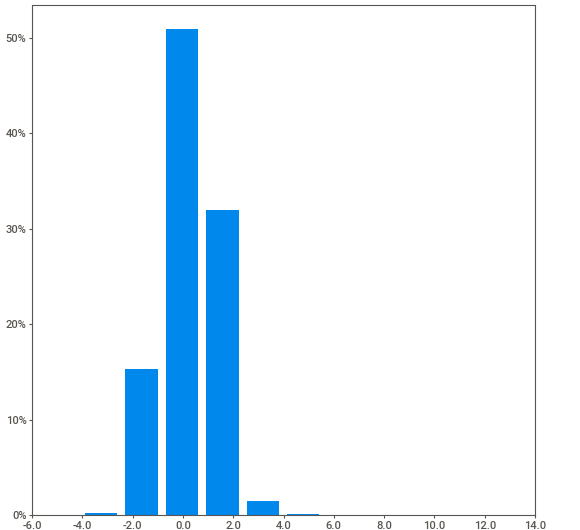
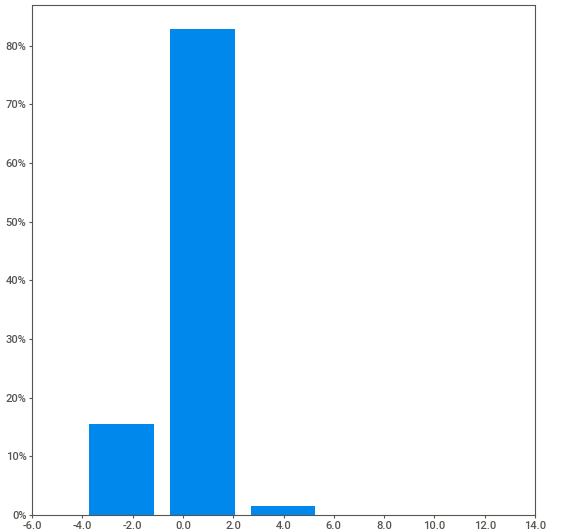
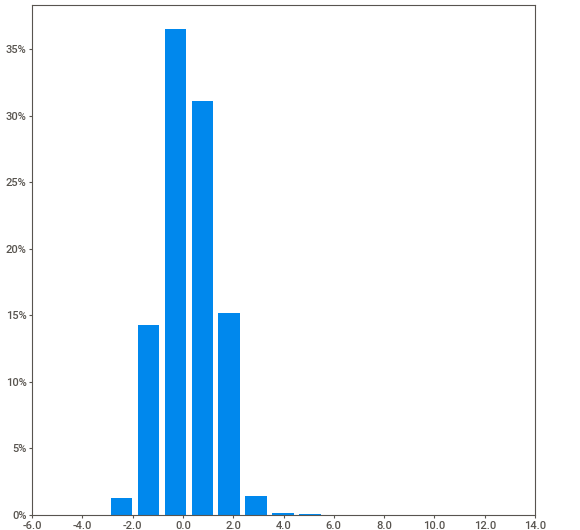
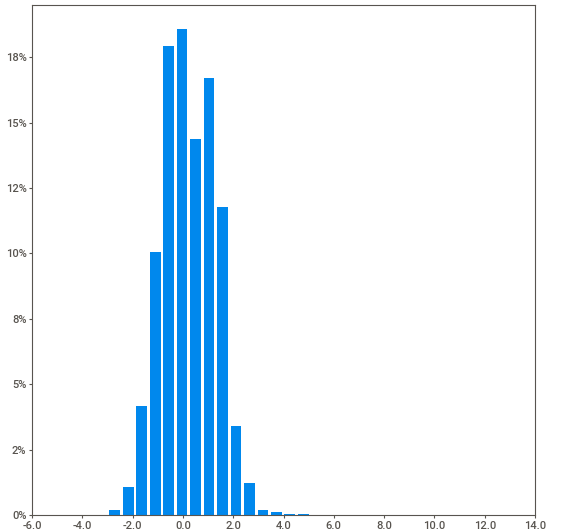
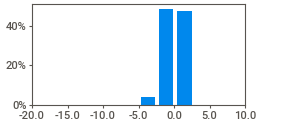
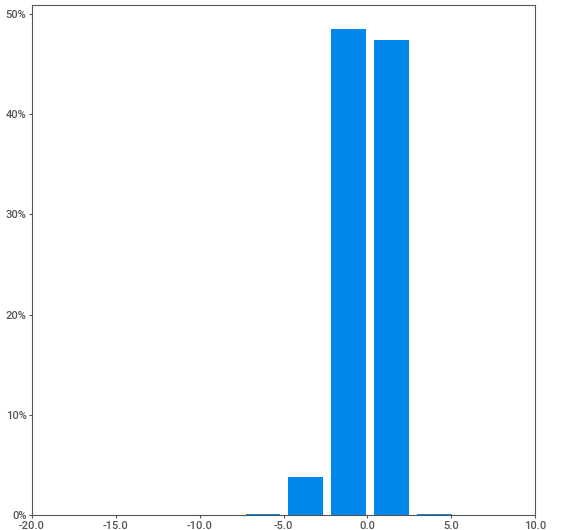
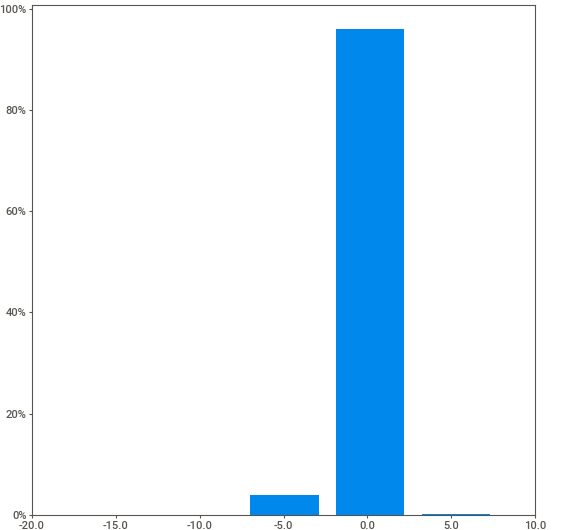
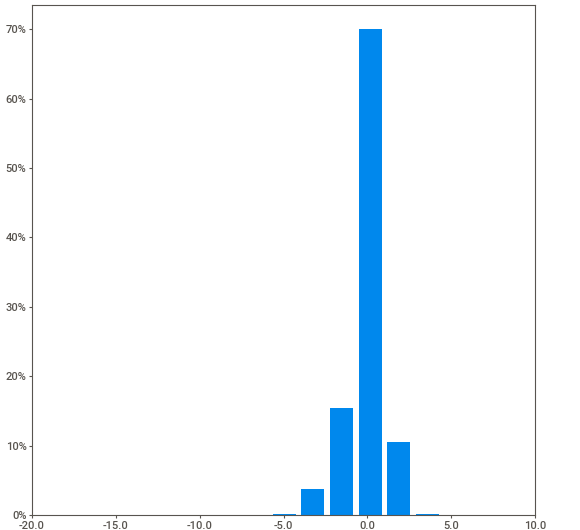
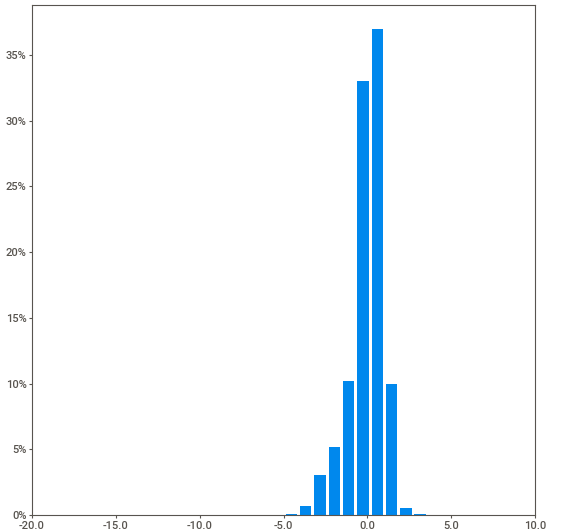
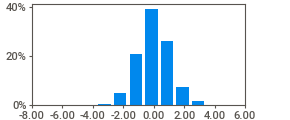
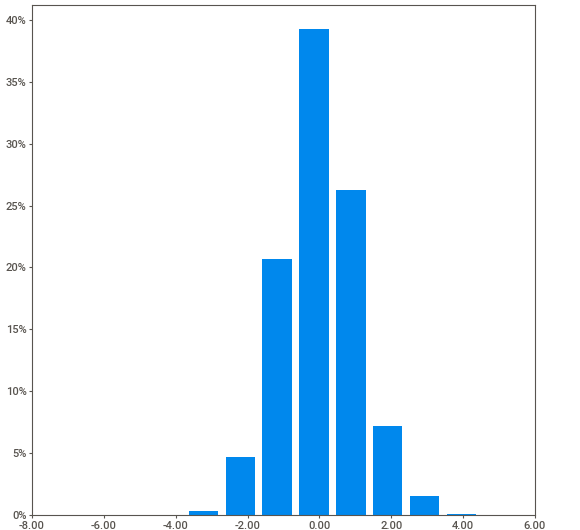
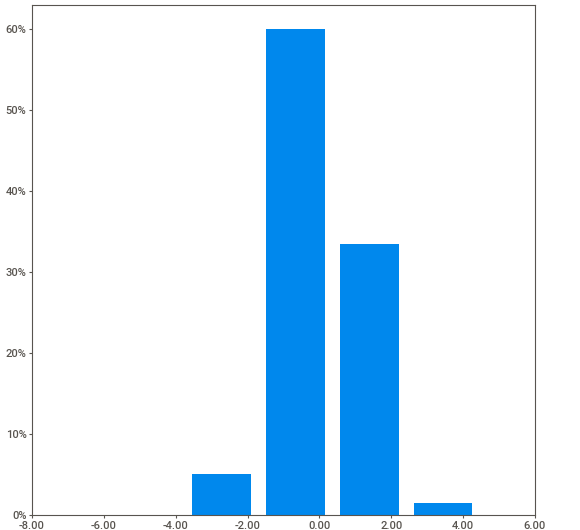
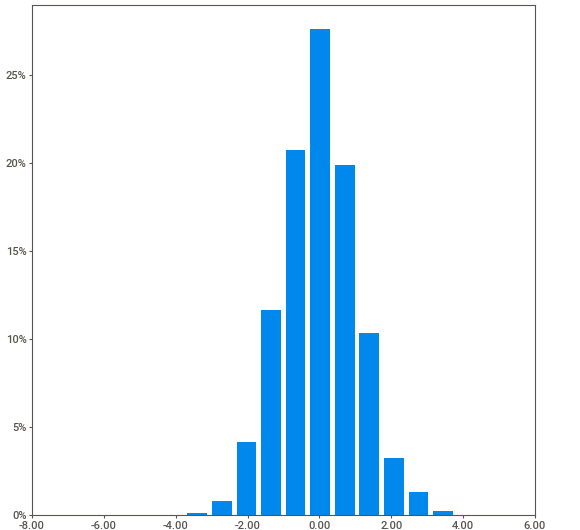
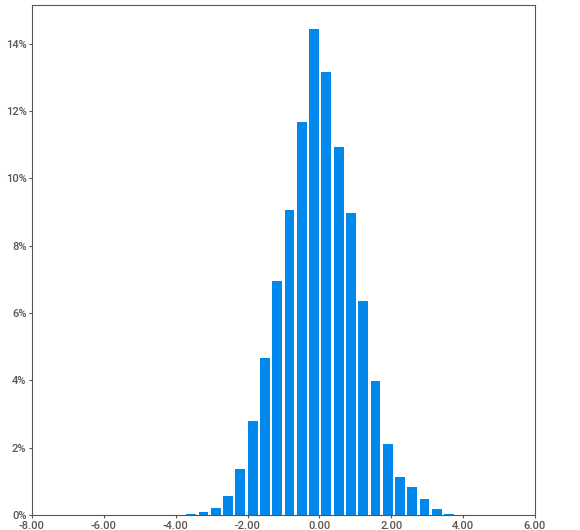
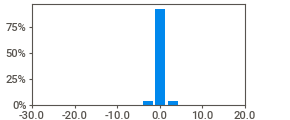
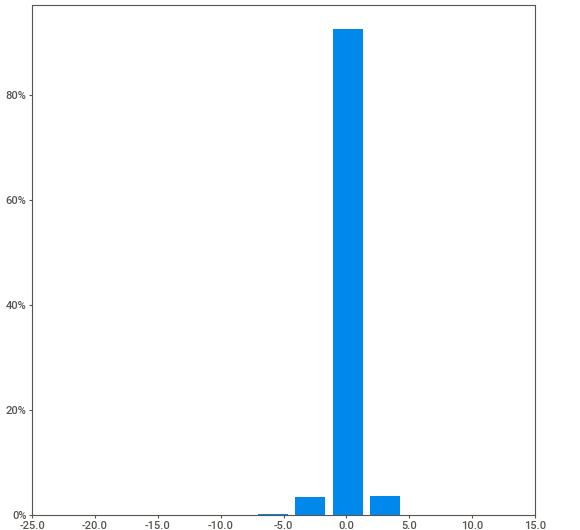
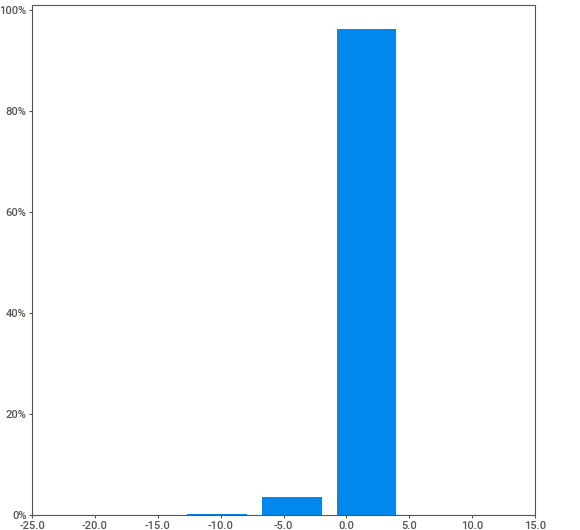
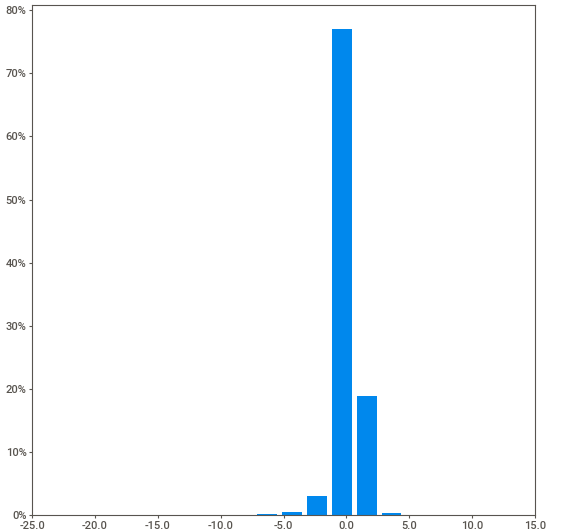
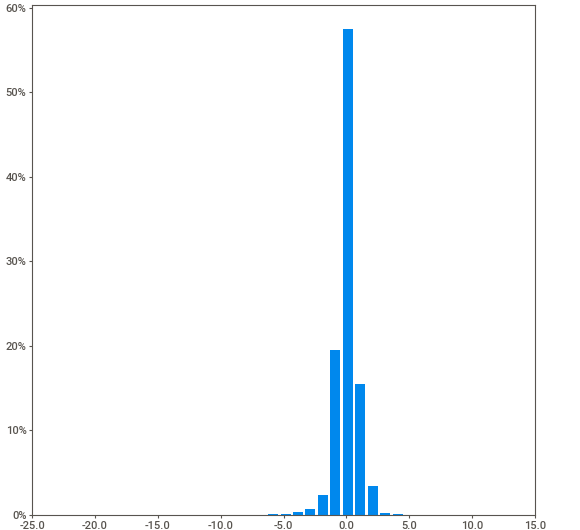
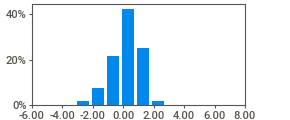
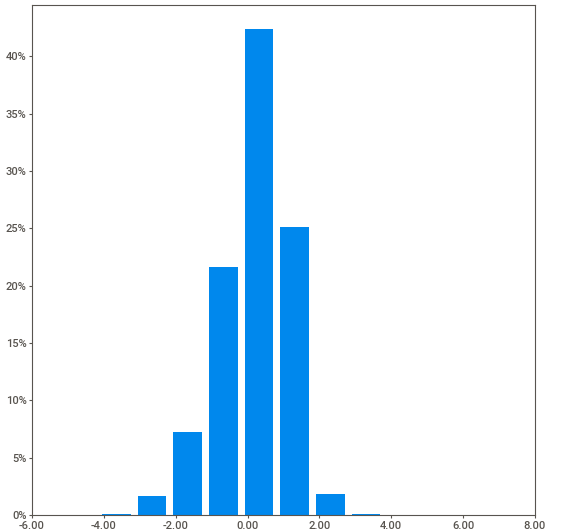
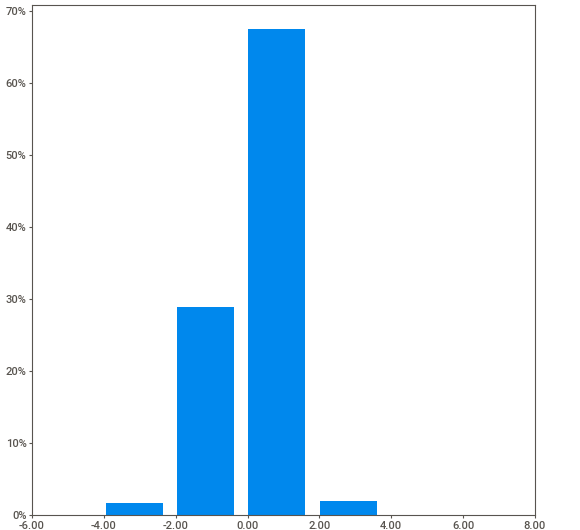
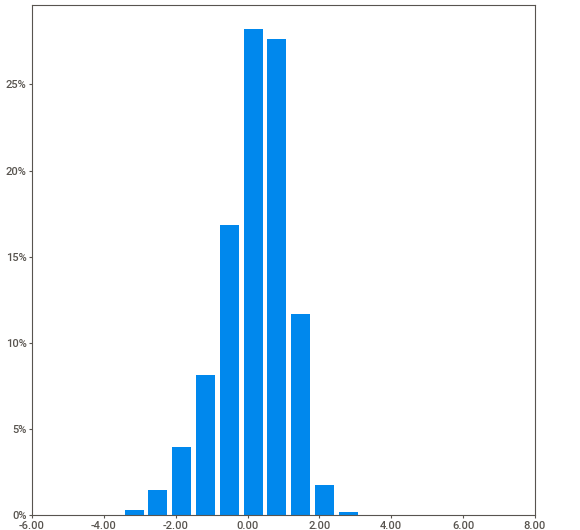
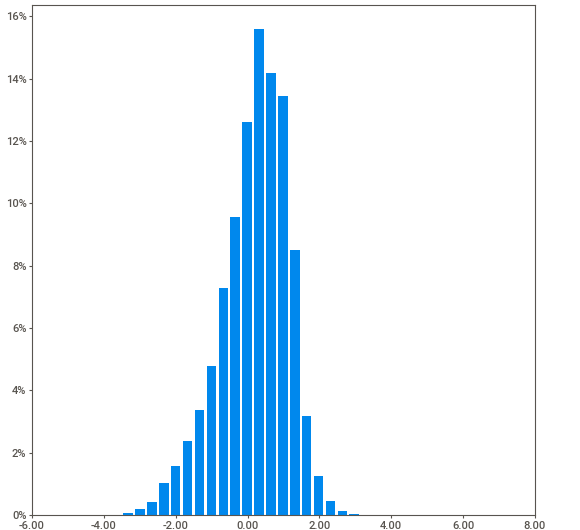
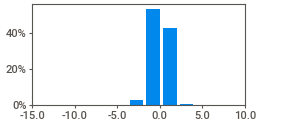
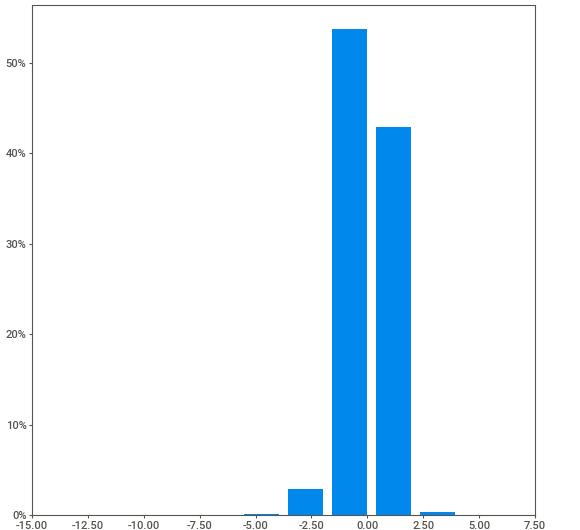
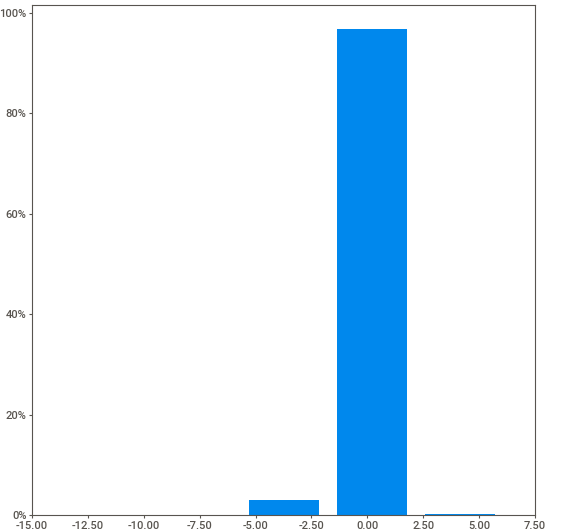
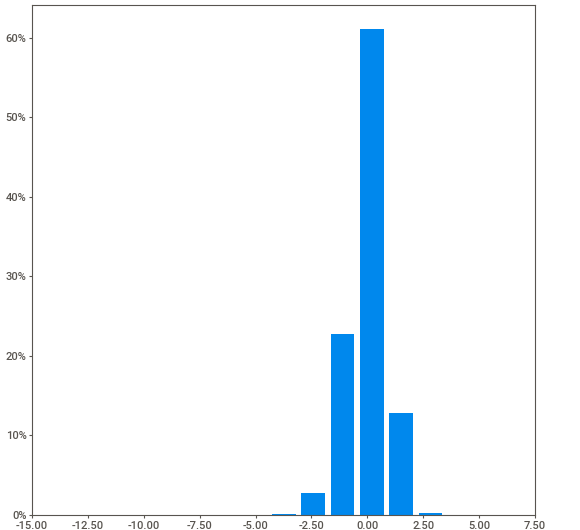
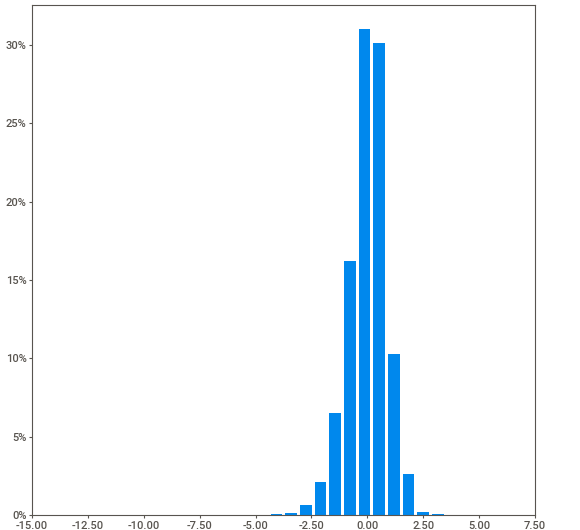
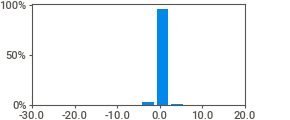
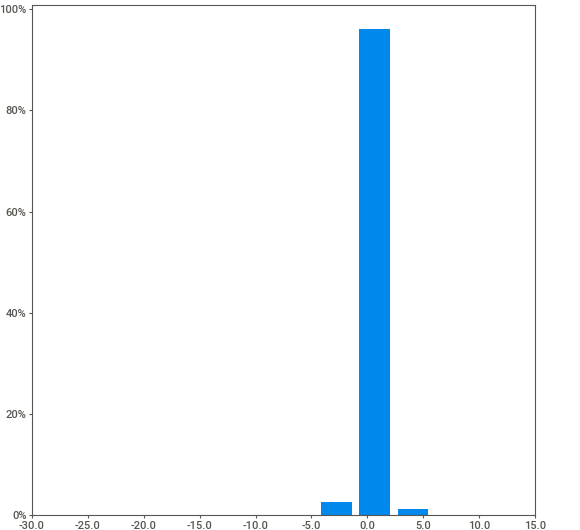
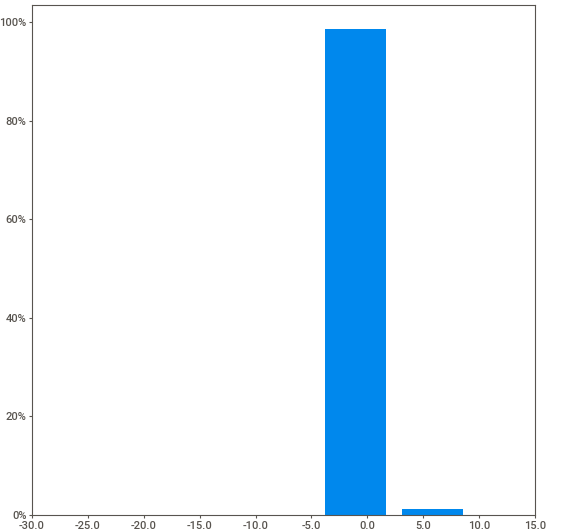
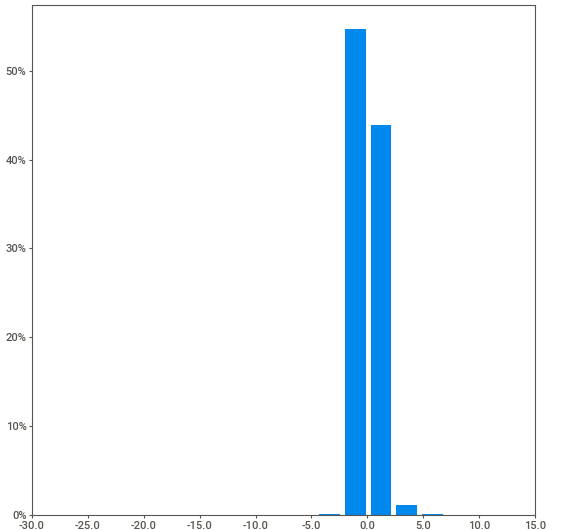
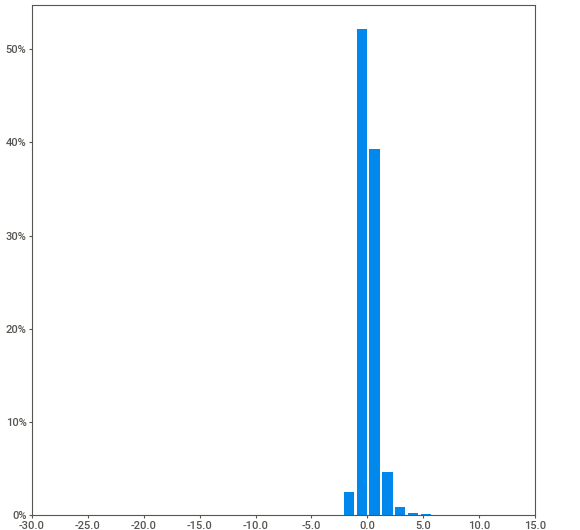
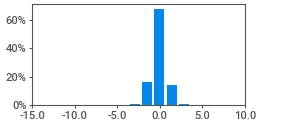
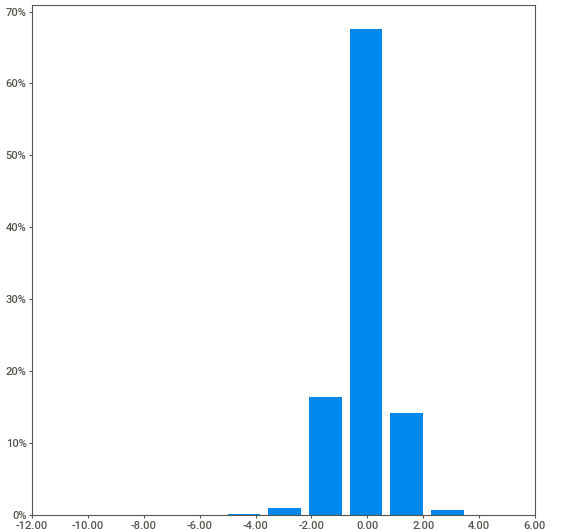
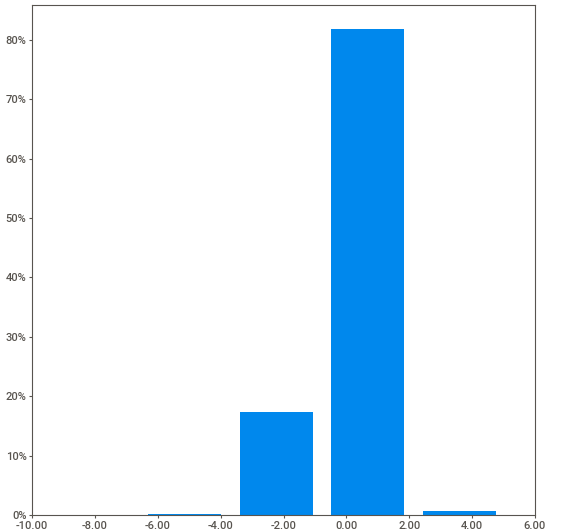
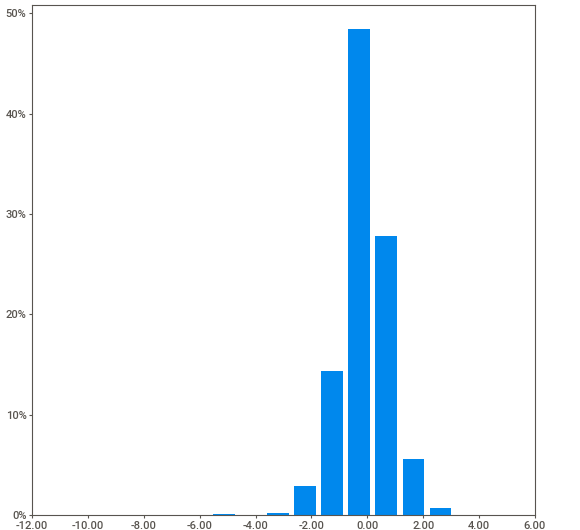
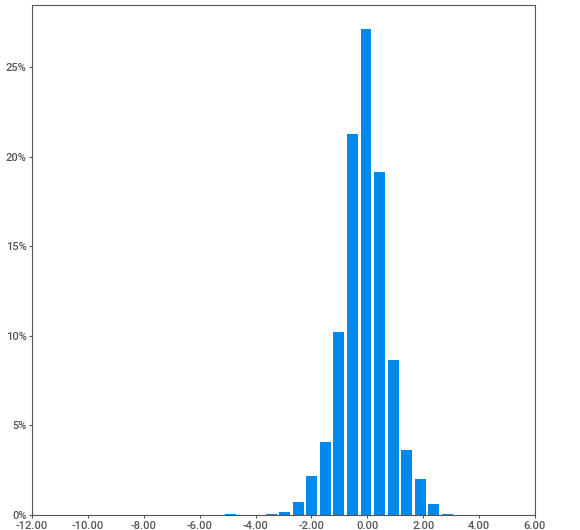
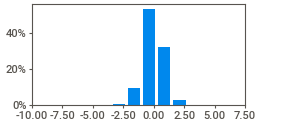
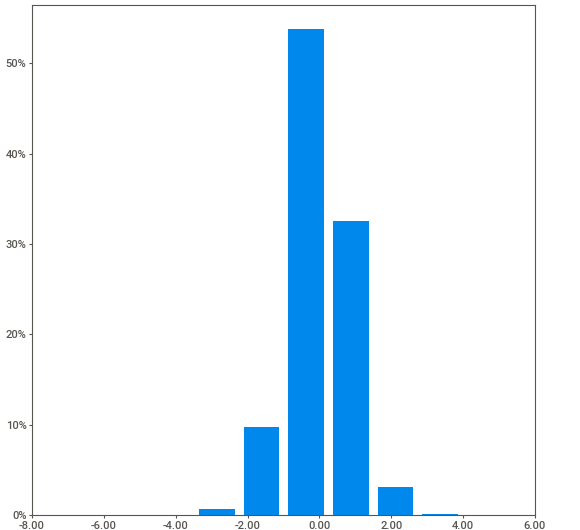
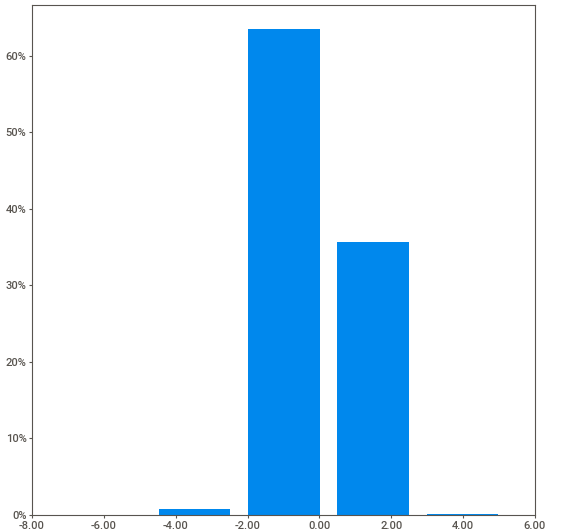
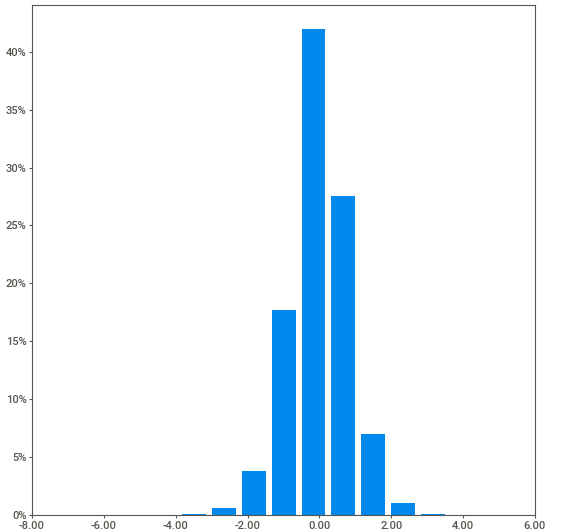
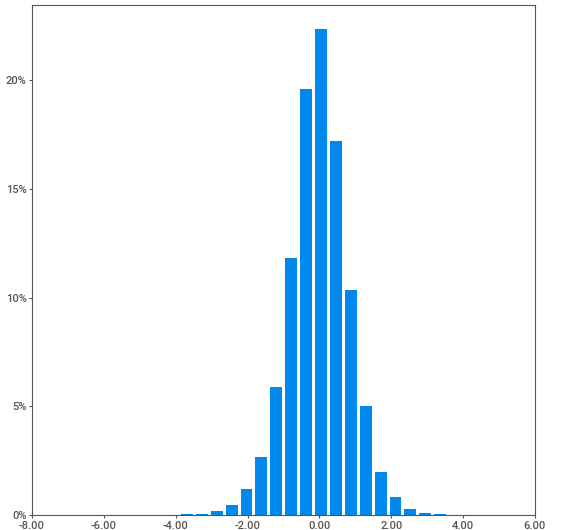
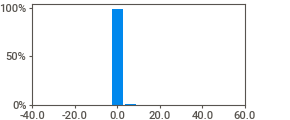
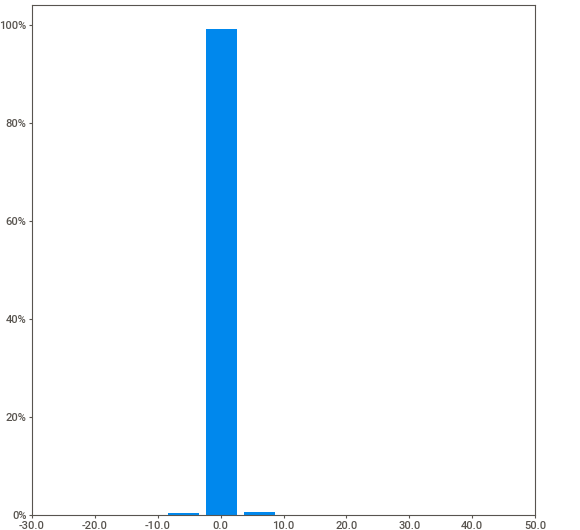
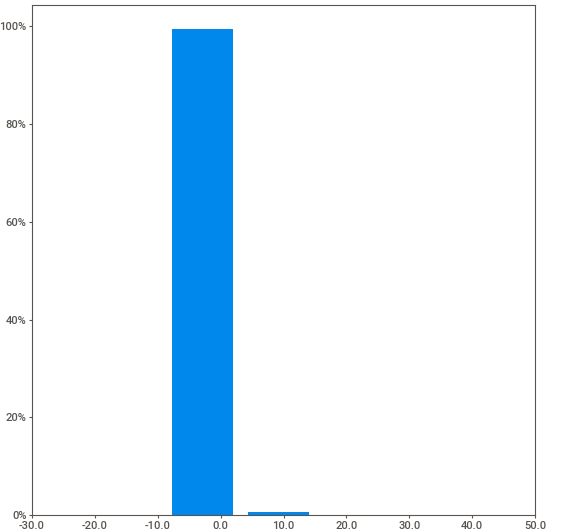
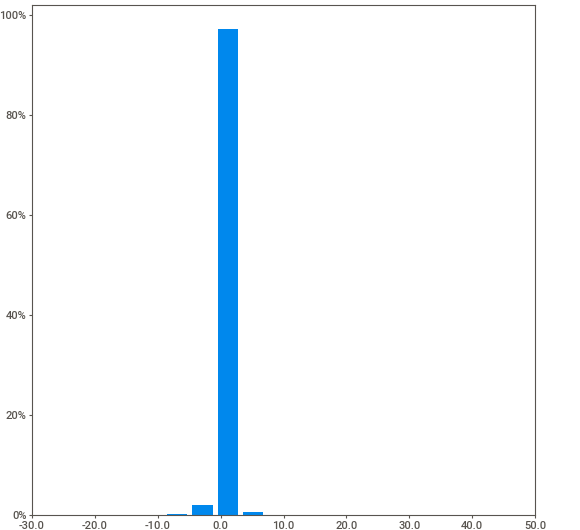
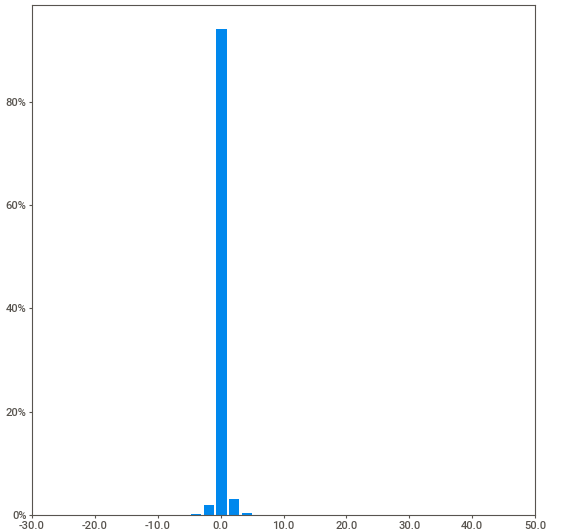
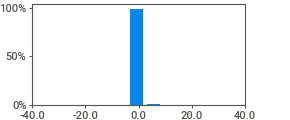
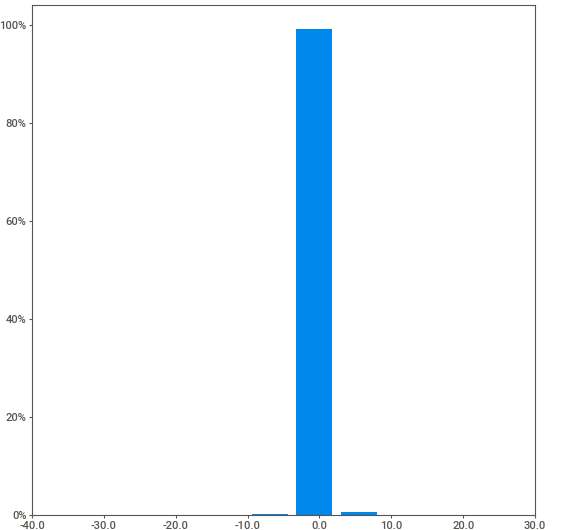
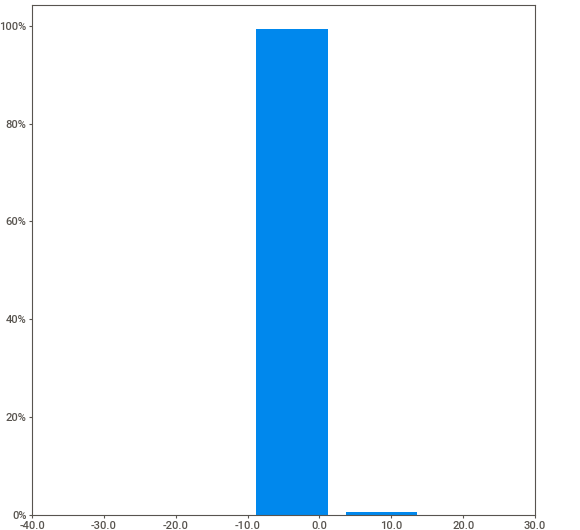
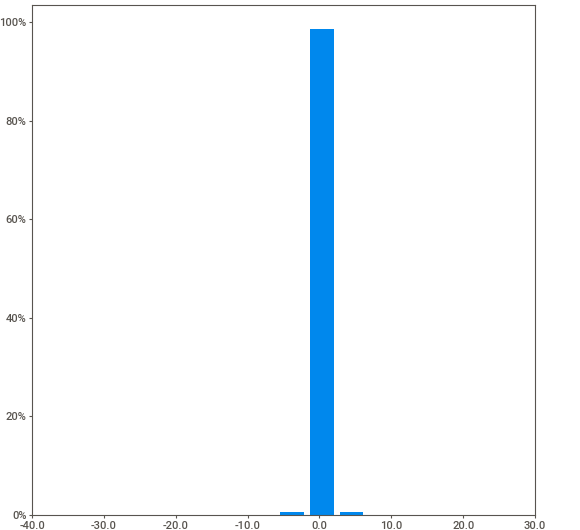
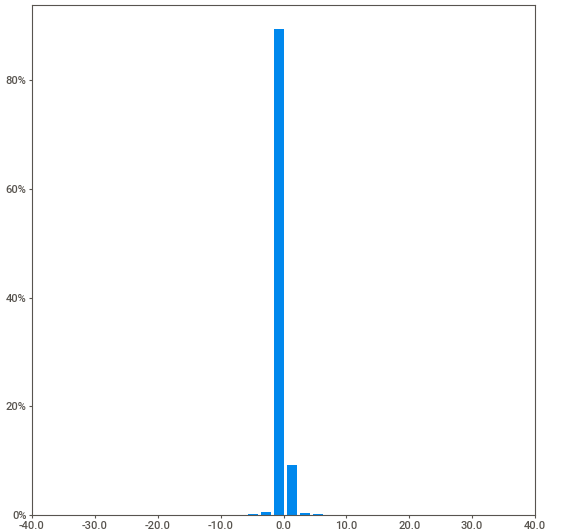
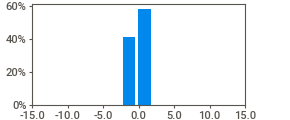
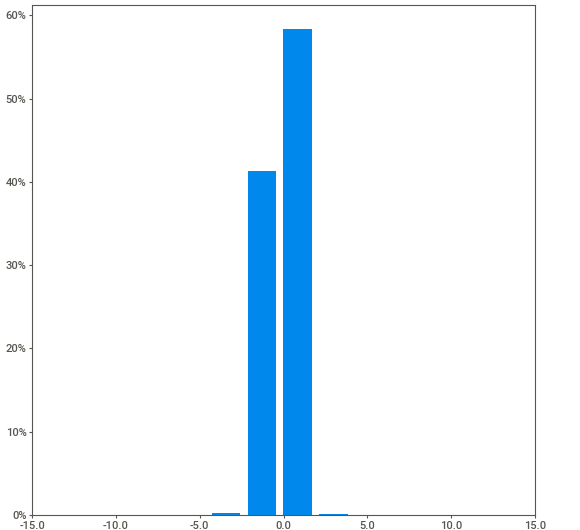
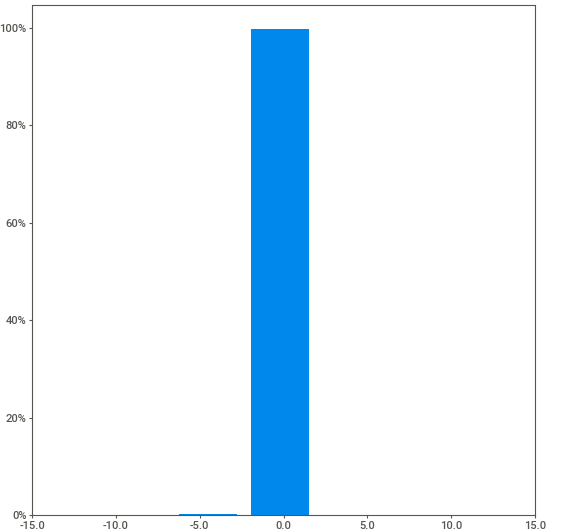
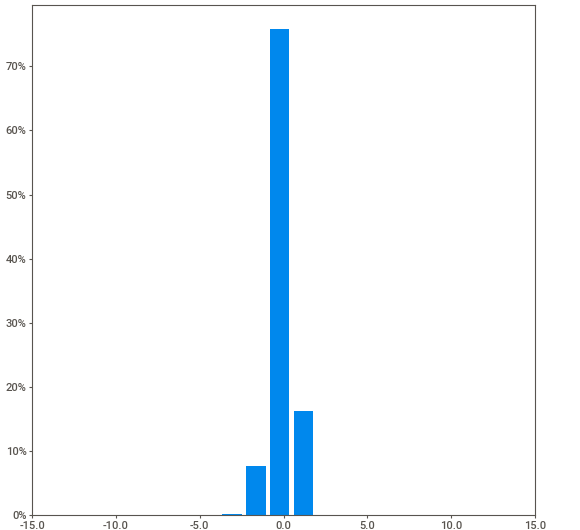
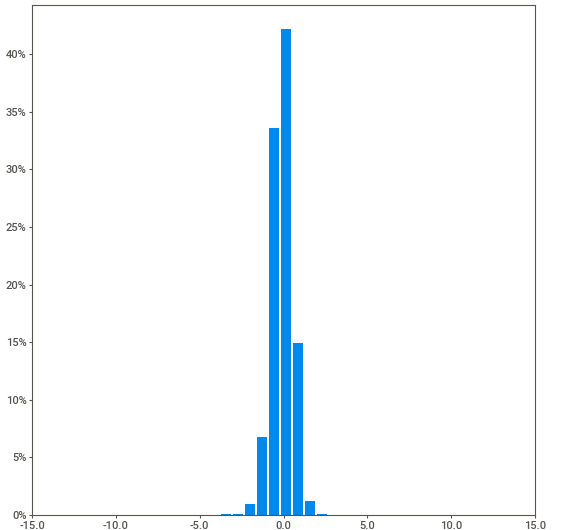
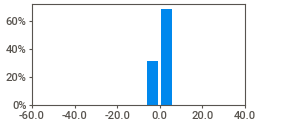
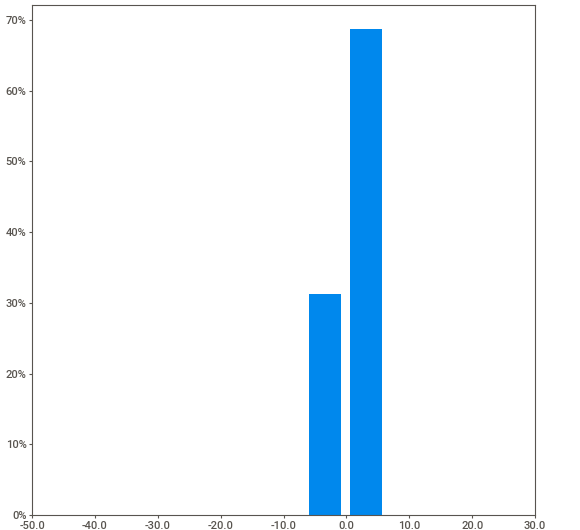
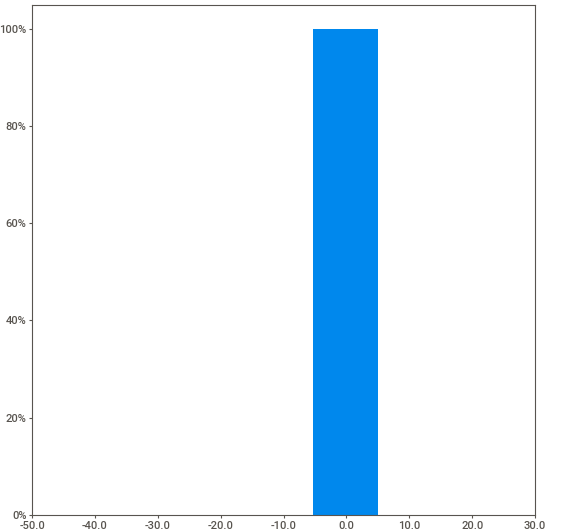
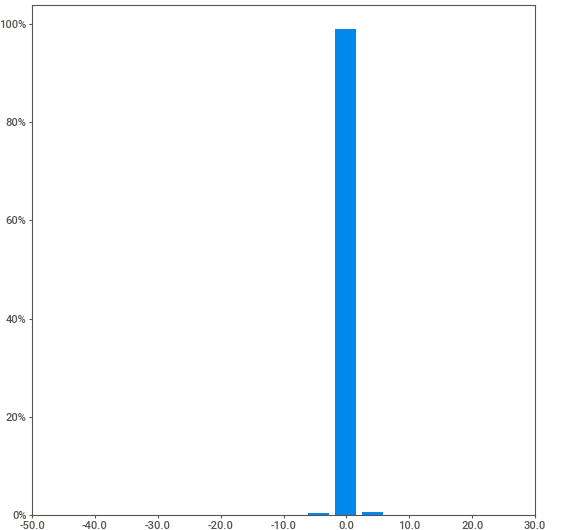
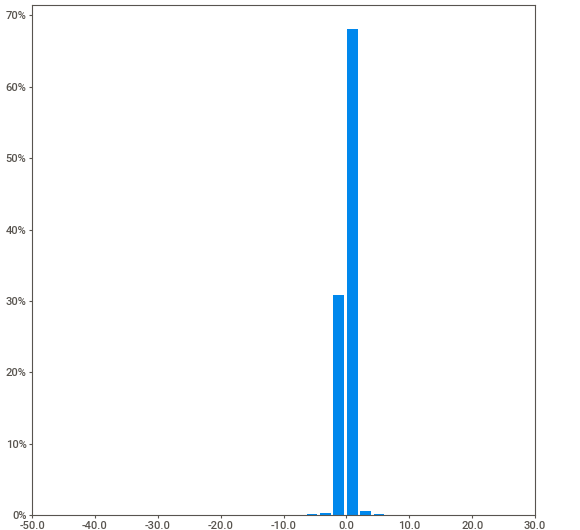
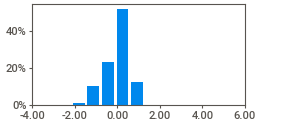
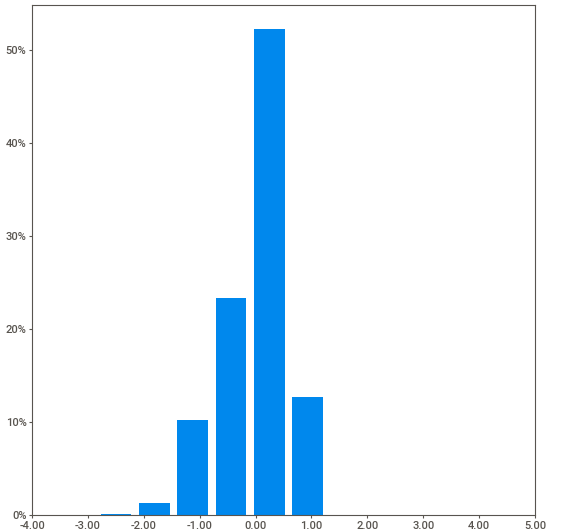
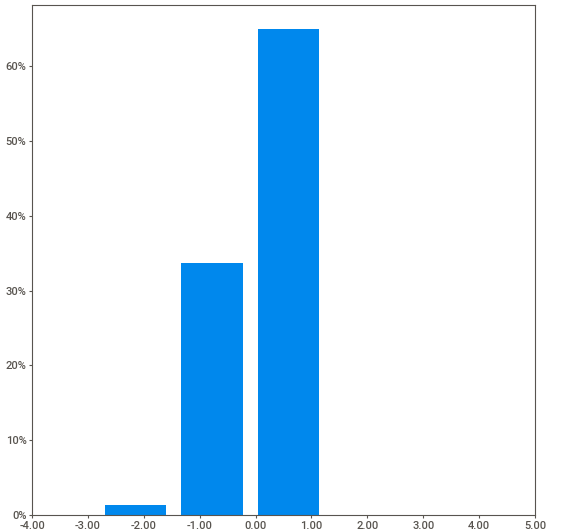
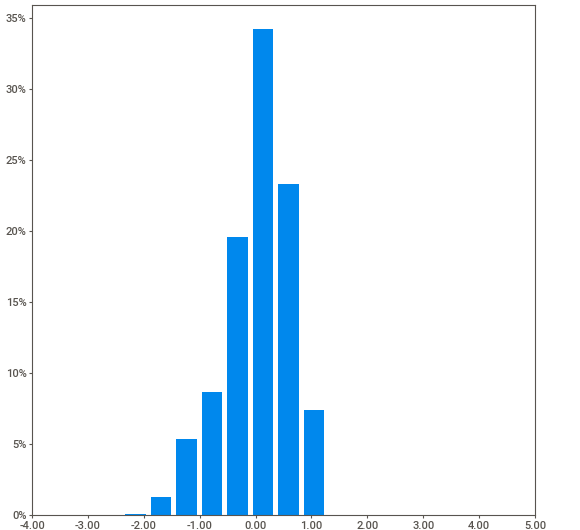
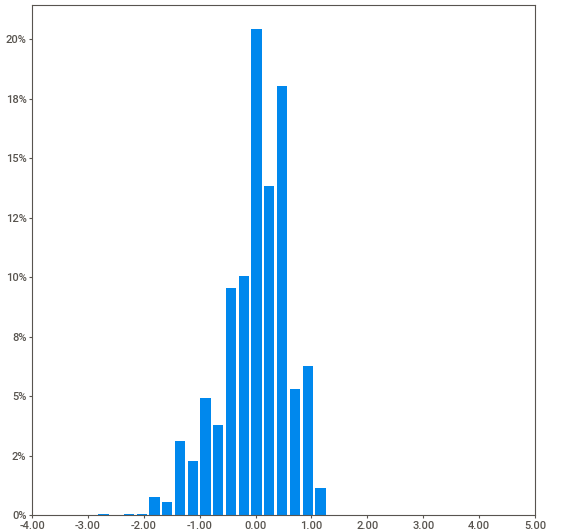
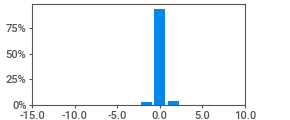
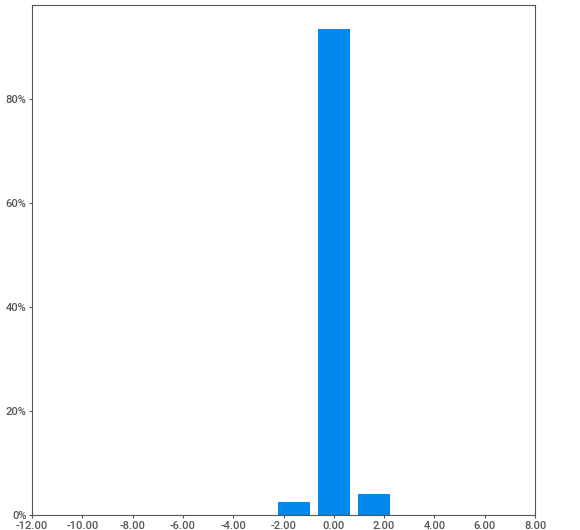
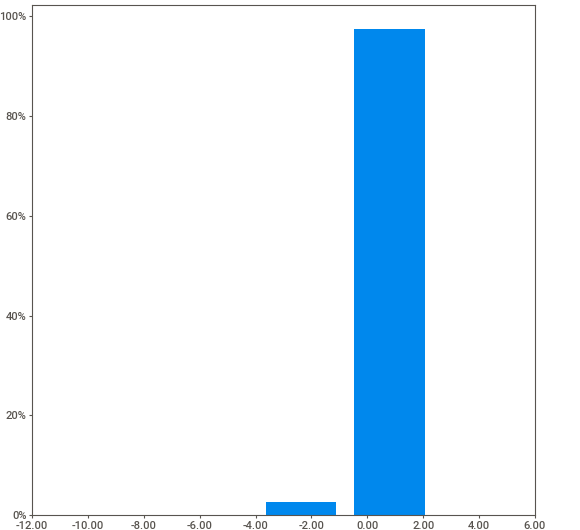
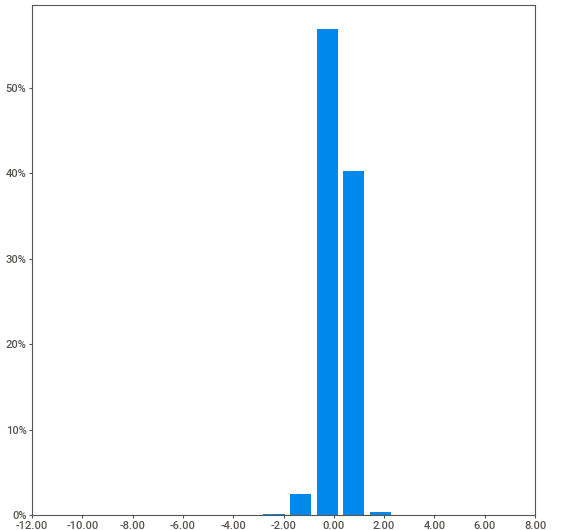
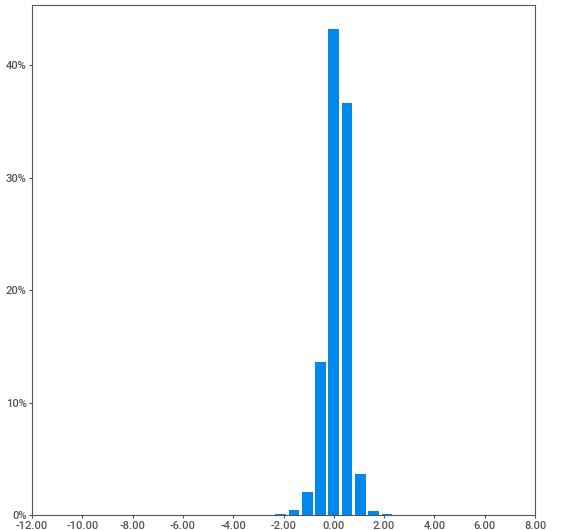
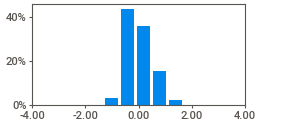
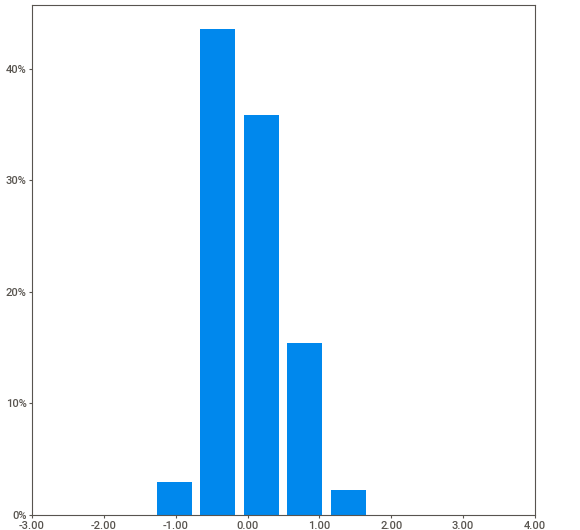
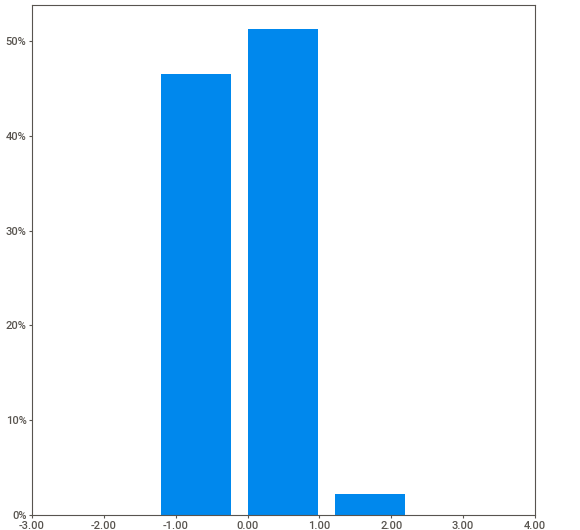
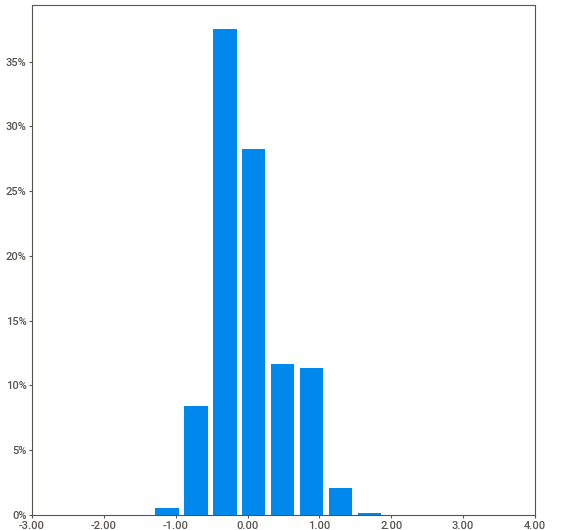
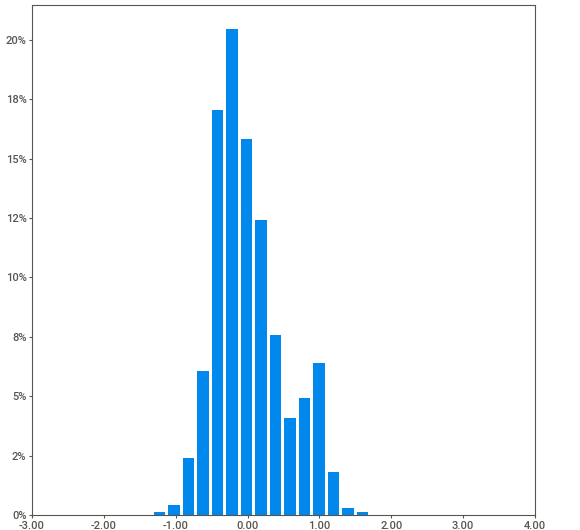
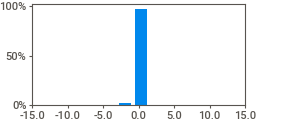
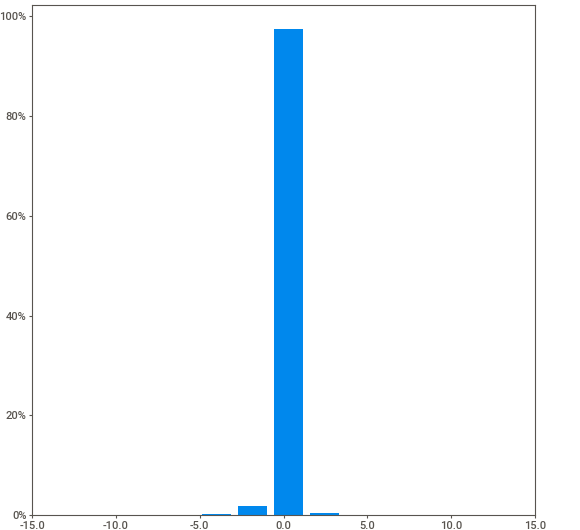
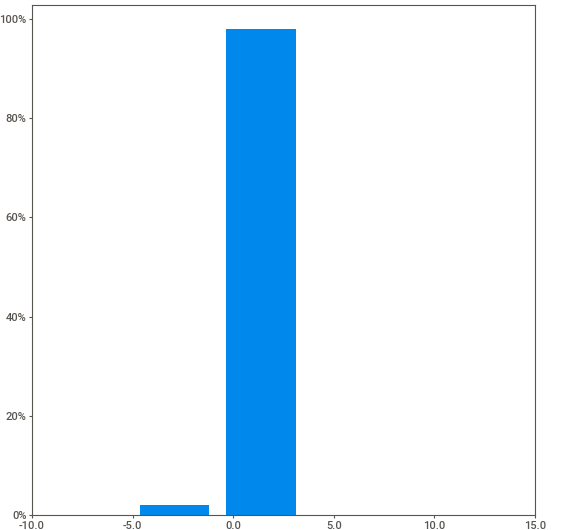
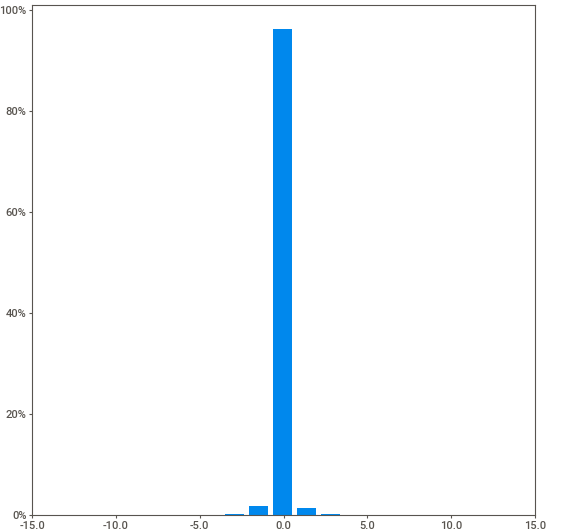
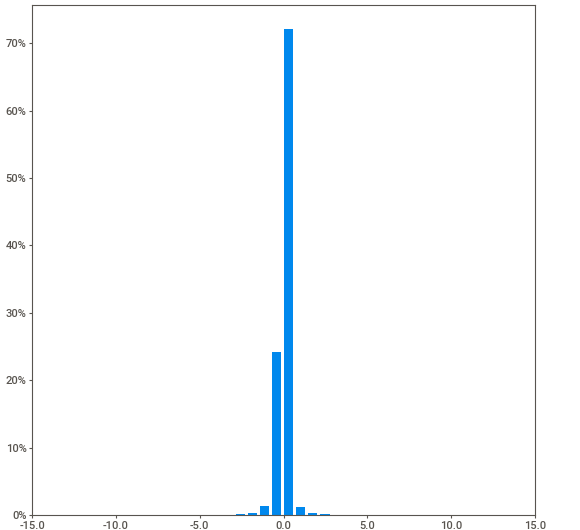
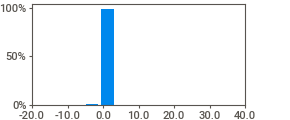
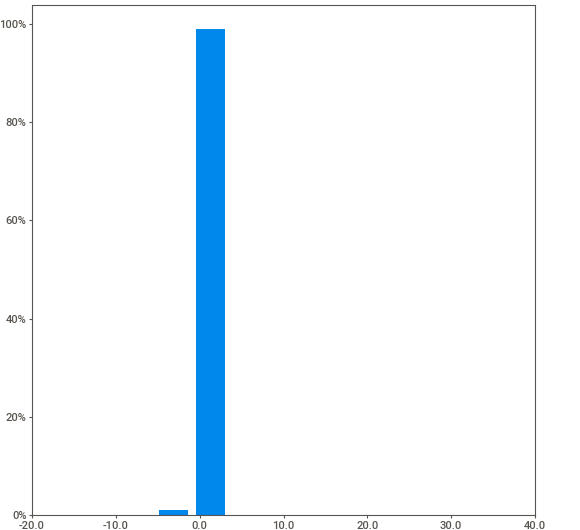
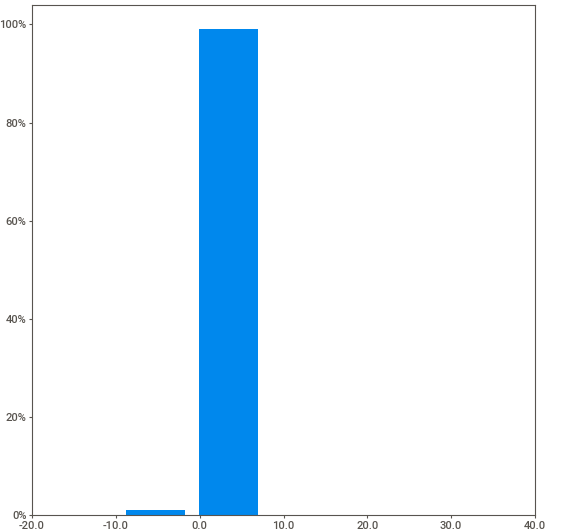
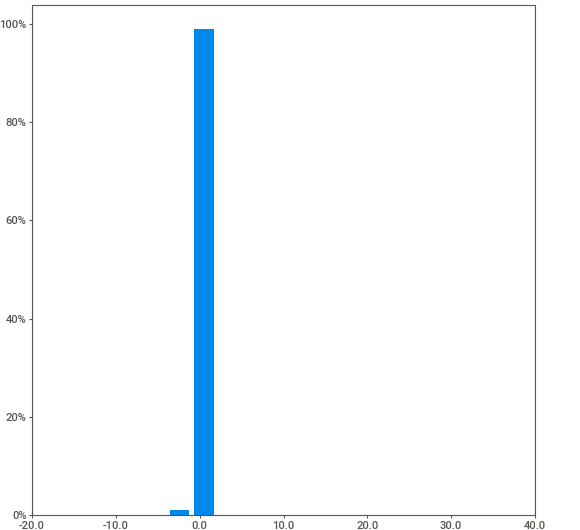
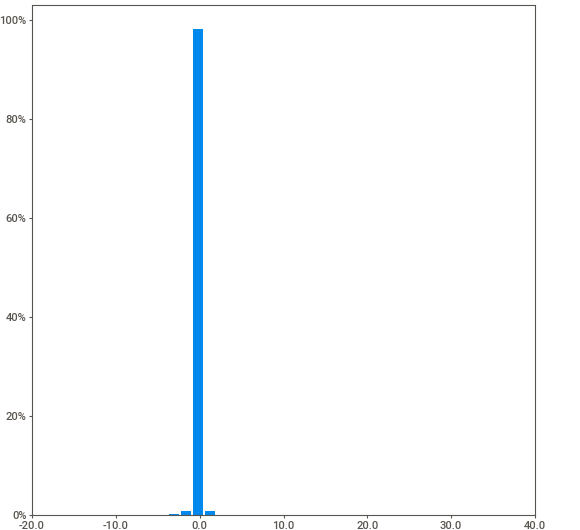
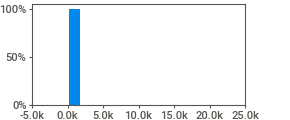
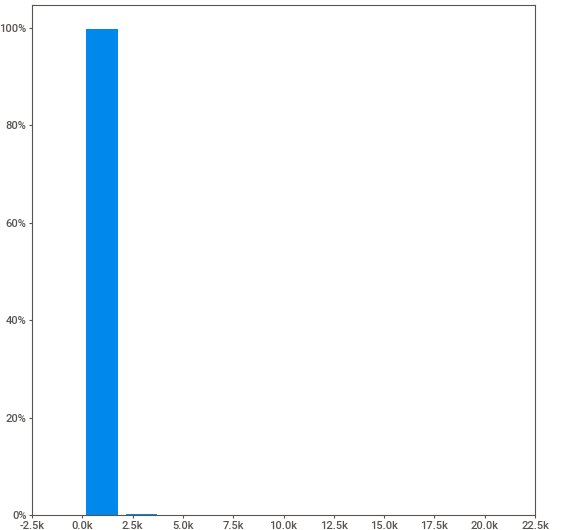
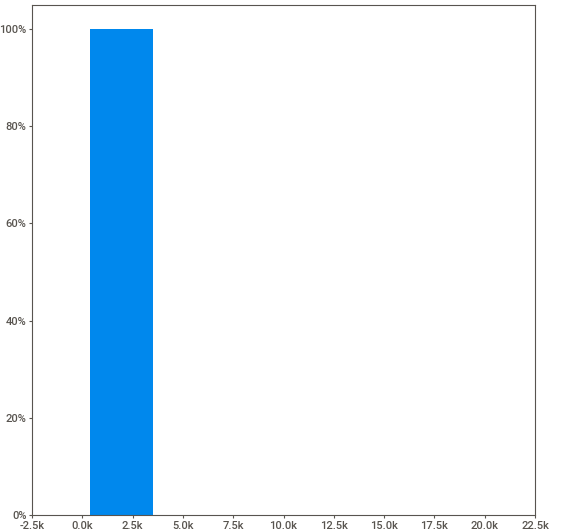
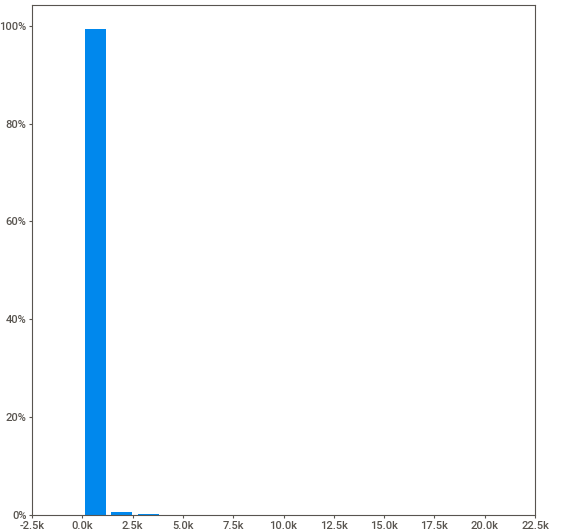
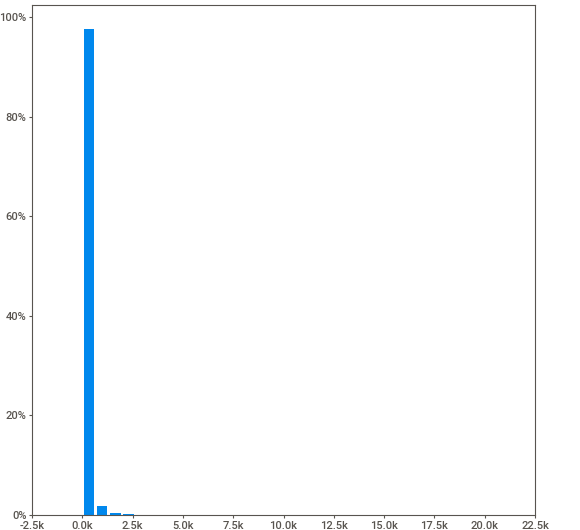
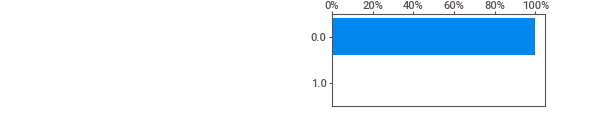
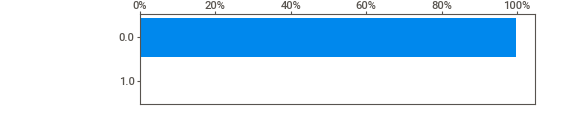
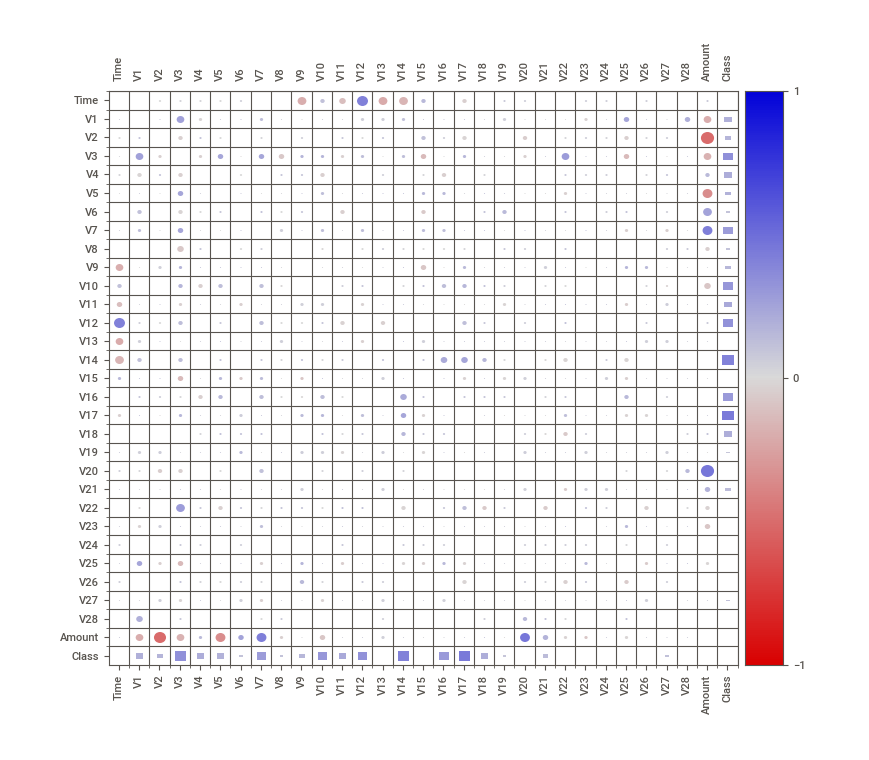
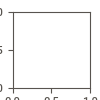

In [14]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import sweetviz as sv

df = pd.read_csv('card_fraud.csv')

# design_report = ProfileReport(df)
# design_report.to_file(output_file='report.html')

sweet_report = sv.analyze(df)
sweet_report.show_html('card_fraud_report.html')

sweet_report.show_notebook(w=None, h=None,
scale=None,
layout='vertical')


In [15]:
# data 를  target 과 test , train set으로 나눈다. 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *

target=df[['Class']]
data=df.drop(columns=['Class'])

x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2 , random_state=42)

scaler = StandardScaler()

# 평균 0 , 분산 1로 조정합니다
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)

# 새 섹션

In [16]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_scaled, x_valid_scaled, y_train, y_valid)
print(models)

100%|██████████| 29/29 [00:00<00:00, 4282.46it/s]

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


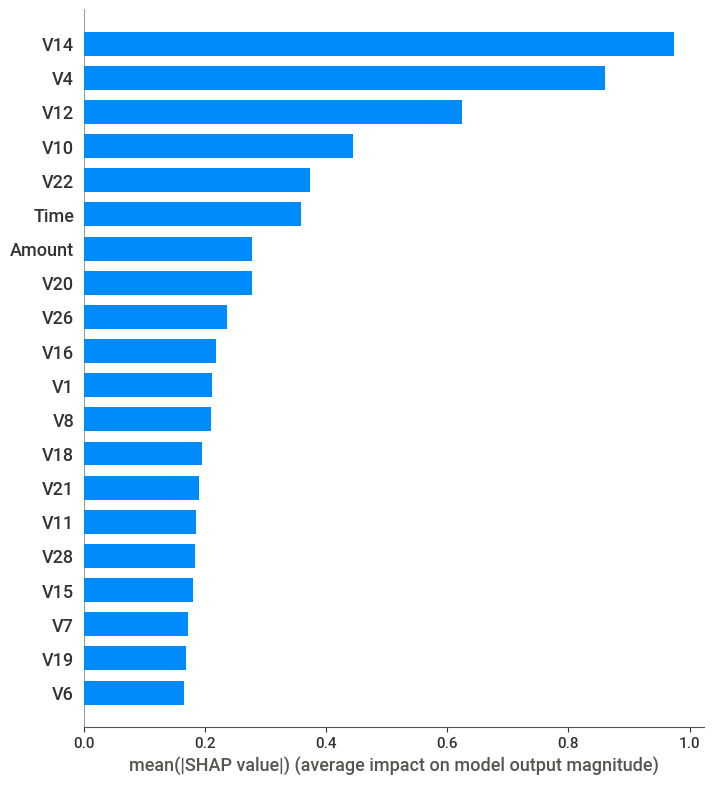

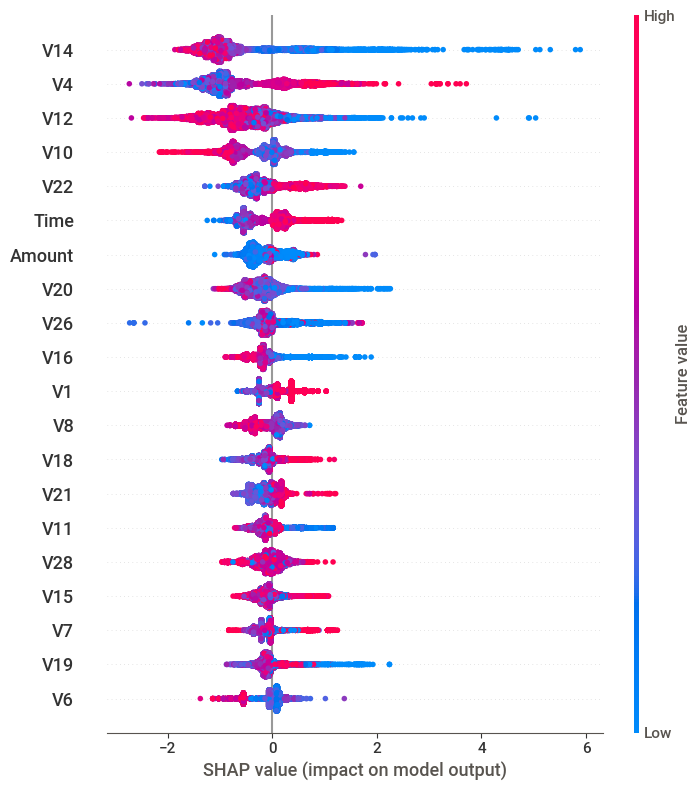

In [17]:
import shap
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(x_train_scaled, y_train)
explainer = shap.TreeExplainer(xgbc)
shap_values = explainer.shap_values(x_train_scaled)

shap_values = explainer.shap_values(x_valid_scaled,approximate=True)
shap.summary_plot(shap_values, x_valid_scaled, plot_type="bar", feature_names = x_train.columns)
shap.summary_plot(shap_values, x_valid_scaled, feature_names = x_train.columns)

In [18]:
df_s = df[['V14','V4','V12','V19','Amount','Time','V10','Class']]
df_s

target_s=df_s[['Class']]
data_s=df_s.drop(columns=['Class'])

x_train_s, x_valid_s, y_train_s, y_valid_s = train_test_split(data_s, target_s, test_size=0.2 , random_state=42)

scaler = StandardScaler()

# 평균 0 , 분산 1로 조정합니다
x_train_scaled_s = scaler.fit_transform(x_train_s)
x_valid_scaled_s = scaler.fit_transform(x_valid_s)


clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_scaled_s, x_valid_scaled_s, y_train_s, y_valid_s)
print(models)


100%|██████████| 29/29 [00:00<00:00, 2106.19it/s]

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


# 새 섹션